# Importing Packages

In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
import gensim.models
import os
import nltk
import tensorflow as tf
import tensorflow.keras

from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model


from gensim.test.utils import datapath
from nltk.stem import WordNetLemmatizer
from gensim import utils
from os import listdir
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, manifold, decomposition
from sklearn.metrics import (
    adjusted_rand_score,
    confusion_matrix,
    classification_report,
    f1_score,
)
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from glob import glob
from matplotlib.image import imread

In [325]:
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("words")
nltk.download("wordnet")

plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("pastel")

[nltk_data] Downloading package punkt to /Users/amelie-
[nltk_data]     dzovinar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/amelie-
[nltk_data]     dzovinar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /Users/amelie-
[nltk_data]     dzovinar/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/amelie-
[nltk_data]     dzovinar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Importing Data

In [326]:
raw_data = pd.read_csv("data/flipkart_com-ecommerce_sample_1050.csv")
print(raw_data.shape)

(1050, 15)


In [327]:
raw_data.head()

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    False  Key Features of Jaipur Print Cotton Floral Kin...   

        product_rating       overall_rating                  brand  \
0  No rating available  No rating available               Elegance   
1  No rating available  No rating available               Sathiyas   
2  No rating available  No rating available                Eurospa   
3  No rating available  No rating available  SANTOSH ROYAL FASHION   
4  No rating available  No rating available           Jaipur Print   

                              product_specifications  
0  {"product_specification"=>[{"key"=>"Brand", "v...  
1  {"product_specification"=>[{"key"=>"Machine Wa...  
2  {"product_specification"=>[{"key"=>"Material",...  
3  {"product_specification"=>[{"key"=>"Brand", "v...  
4  {"product_specification"=>[{"key"=>"Machine Wa...

In [328]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

There is very little missing data and it concerns columns that will not be useful moving forward.

In [329]:
raw_data.describe(include="all")

uniq_id            crawl_timestamp  \
count                               1050                       1050   
unique                              1050                        149   
top     55b85ea15a1536d46b7190ad6fff8ce7  2015-12-01 12:40:44 +0000   
freq                                   1                        150   
mean                                 NaN                        NaN   
std                                  NaN                        NaN   
min                                  NaN                        NaN   
25%                                  NaN                        NaN   
50%                                  NaN                        NaN   
75%                                  NaN                        NaN   
max                                  NaN                        NaN   

                                              product_url  \
count                                                1050   
unique                                               1050   
top     http://www.flipkart.com/elegance-polyester-mul...   
freq                                                    1   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                             product_name  \
count                                                1050   
unique                                               1050   
top     Elegance Polyester Multicolor Abstract Eyelet ...   
freq                                                    1   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                    product_category_tree               pid  \
count                                                1050              1050   
unique                                                642              1050   
top     ["Home Furnishing >> Bed Linen >> Blankets, Qu...  CRNEG7BKMFFYHQ8Z   
freq                                                   56                 1   
mean                                                  NaN               NaN   
std                                                   NaN               NaN   
min                                                   NaN               NaN   
25%                                                   NaN               NaN   
50%                                                   NaN               NaN   
75%                                                   NaN               NaN   
max                                                   NaN               NaN   

         retail_price  discounted_price                                 image  \
count     1049.000000       1049.000000                                  1050   
unique            NaN               NaN                                  1050   
top               NaN               NaN  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
freq              NaN               NaN                                     1   
mean      2186.197331       1584.527169                                   NaN   
std       7639.229411       7475.099680                                   NaN   
min         35.000000         35.000000                                   NaN   
25%        555.000000        340.000000                                   NaN   
50%        999.000000        600.000

In [330]:
raw_data.duplicated(subset="uniq_id").sum()

0

There are no duplicated entries and the necessary columns for both text and image analysis are not missing any data. We can therefore more forward with the analysis

# Text Analysis

Identifying the product's category from the category tree

In [331]:
def extract_category(df):
    df["category"] = df["product_category_tree"].apply(
        lambda category_tree: category_tree.split(" >>")[0].replace('["', "")
    )

    return df

In [332]:
data = extract_category(raw_data)

In [333]:
data

uniq_id            crawl_timestamp  \
0     55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1     7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2     64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3     d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4     6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   
...                                ...                        ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc  2015-12-01 10:15:43 +0000   
1046  fd6cbcc22efb6b761bd564c28928483c  2015-12-01 10:15:43 +0000   
1047  5912e037d12774bb73a2048f35a00009  2015-12-01 10:15:43 +0000   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6  2015-12-01 10:15:43 +0000   
1049  f2f027ad6a6df617c9f125173da71e44  2015-12-01 10:15:43 +0000   

                                            product_url  \
0     http://www.flipkart.com/elegance-polyester-mul...   
1     http://www.flipkart.com/sathiyas-cotton-bath-t...   
2     http://www.flipkart.com/eurospa-cotton-terry-f...   
3     http://www.flipkart.com/santosh-royal-fashion-...   
4     http://www.flipkart.com/jaipur-print-cotton-fl...   
...                                                 ...   
1045  http://www.flipkart.com/oren-empower-extra-lar...   
1046  http://www.flipkart.com/wallmantra-large-vinyl...   
1047  http://www.flipkart.com/uberlyfe-extra-large-p...   
1048  http://www.flipkart.com/wallmantra-medium-viny...   
1049  http://www.flipkart.com/uberlyfe-large-vinyl-s...   

                                           product_name  \
0     Elegance Polyester Multicolor Abstract Eyelet ...   
1                            Sathiyas Cotton Bath Towel   
2                   Eurospa Cotton Terry Face Towel Set   
3     SANTOSH ROYAL FASHION Cotton Printed King size...   
4     Jaipur Print Cotton Floral King sized Double B...   
...                                                 ...   
1045     Oren Empower Extra Large Self Adhesive Sticker   
1046             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films...   
1048            Wallmantra Medium Vinyl Sticker Sticker   
1049                       Uberlyfe Large Vinyl Sticker   

                                  product_category_tree               pid  \
0     ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   
...                                                 ...               ...   
1045  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE88ZGTX65GH4V   
1046  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZD5GDCVQ   
1047  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE5UVGW2JWVWCT   
1048  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZGFD3RCE   
1049  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE2ZEPACRQJKH7   

      retail_price  discounted_price                                 image  \
0           1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1            600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2              NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3           2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4           2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   
...            ...               ...                                   ...   
1045        1399.0             999.0  958f54f4c46b53c8a0a9b8167d9140bc.jpg   
1046        4930.0            1896.0  fd6cbcc22efb6b761bd564c28928483c.jpg   
1047        4500.0            1449.0  5912e037d12774bb73a2048f35a00009.jpg   
1048        3465.0            1333.0  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg   
1

In [334]:
data["category"].unique()

array(['Home Furnishing', 'Baby Care', 'Watches',
       'Home Decor & Festive Needs', 'Kitchen & Dining',
       'Beauty and Personal Care', 'Computers'], dtype=object)

There are 7 different categories of product for which we need to determine whether they can be automatically determined based on an image and/or the product description. 

In [335]:
le = preprocessing.LabelEncoder()
le.fit(data["category"])
data["encoded_category"] = le.transform(data["category"])
data.head(5)

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    False  Key Features of Jaipur Print Cotton Floral Kin...   

        product_rating       overall_rating                  brand  \
0  No rating available  No rating available               Elegance   
1  No rating available  No rating available               Sathiyas   
2  No rating available  No rating available                Eurospa   
3  No rating available  No rating available  SANTOSH ROYAL FASHION   
4  No rating available  No rating available           Jaipur Print   

                              product_specifications         category  \
0  {"product_specification"=>[{"key"=>"Brand", "v...  Home Furnishing   
1  {"product_specification"=>[{"key"=>"Machine Wa...        Baby Care   
2  {"product_specification"=>[{"key"=>"Material",...        Baby Care   
3  {"product_specification"=>[{"key"=>"Brand", "v...  Home Furnishing   
4  {"product_specification"=>[{"key"=>"Machine Wa...  Home Furnishing   

   encoded_category  
0                 4  
1                 0  
2                 0  
3                 4  
4                 4

In [336]:
data.groupby("encoded_category").count()

uniq_id  crawl_timestamp  product_url  product_name  \
encoded_category                                                        
0                     150              150          150           150   
1                     150              150          150           150   
2                     150              150          150           150   
3                     150              150          150           150   
4                     150              150          150           150   
5                     150              150          150           150   
6                     150              150          150           150   

                  product_category_tree  pid  retail_price  discounted_price  \
encoded_category                                                               
0                                   150  150           149               149   
1                                   150  150           150               150   
2                                   150  150           150               150   
3                                   150  150           150               150   
4                                   150  150           150               150   
5                                   150  150           150               150   
6                                   150  150           150               150   

                  image  is_FK_Advantage_product  description  product_rating  \
encoded_category                                                                
0                   150                      150          150             150   
1                   150                      150          150             150   
2                   150                      150          150             150   
3                   150                      150          150             150   
4                   150                      150          150             150   
5                   150                      150          150             150   
6                   150                      150          150             150   

                  overall_rating  brand  product_specifications  category  
encoded_category                                                           
0                            150    134                     150       150  
1                            150     41                     150       150  
2                            150    150                     150       150  
3                            150    148                     149       150  
4                            150    150                     150       150  
5                            150     79                     150       150  
6                            150     10                     150       150

In [337]:
example_description = data["description"][0]
example_description

'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you

In [338]:
mapping = data.groupby("category").first()["encoded_category"]
categories = mapping.index.to_list()
print(mapping)
print(categories)

category
Baby Care                     0
Beauty and Personal Care      1
Computers                     2
Home Decor & Festive Needs    3
Home Furnishing               4
Kitchen & Dining              5
Watches                       6
Name: encoded_category, dtype: int64
['Baby Care', 'Beauty and Personal Care', 'Computers', 'Home Decor & Festive Needs', 'Home Furnishing', 'Kitchen & Dining', 'Watches']


## Preprocessing

### Tokenization

In [339]:
print(nltk.tokenize.word_tokenize(example_description))

['Key', 'Features', 'of', 'Elegance', 'Polyester', 'Multicolor', 'Abstract', 'Eyelet', 'Door', 'Curtain', 'Floral', 'Curtain', ',', 'Elegance', 'Polyester', 'Multicolor', 'Abstract', 'Eyelet', 'Door', 'Curtain', '(', '213', 'cm', 'in', 'Height', ',', 'Pack', 'of', '2', ')', 'Price', ':', 'Rs', '.', '899', 'This', 'curtain', 'enhances', 'the', 'look', 'of', 'the', 'interiors.This', 'curtain', 'is', 'made', 'from', '100', '%', 'high', 'quality', 'polyester', 'fabric.It', 'features', 'an', 'eyelet', 'style', 'stitch', 'with', 'Metal', 'Ring.It', 'makes', 'the', 'room', 'environment', 'romantic', 'and', 'loving.This', 'curtain', 'is', 'ant-', 'wrinkle', 'and', 'anti', 'shrinkage', 'and', 'have', 'elegant', 'apparance.Give', 'your', 'home', 'a', 'bright', 'and', 'modernistic', 'appeal', 'with', 'these', 'designs', '.', 'The', 'surreal', 'attention', 'is', 'sure', 'to', 'steal', 'hearts', '.', 'These', 'contemporary', 'eyelet', 'and', 'valance', 'curtains', 'slide', 'smoothly', 'so', 'when',

In [340]:
tokenizer = nltk.RegexpTokenizer(r"[a-zA-Z]+")
print(tokenizer.tokenize(example_description))

['Key', 'Features', 'of', 'Elegance', 'Polyester', 'Multicolor', 'Abstract', 'Eyelet', 'Door', 'Curtain', 'Floral', 'Curtain', 'Elegance', 'Polyester', 'Multicolor', 'Abstract', 'Eyelet', 'Door', 'Curtain', 'cm', 'in', 'Height', 'Pack', 'of', 'Price', 'Rs', 'This', 'curtain', 'enhances', 'the', 'look', 'of', 'the', 'interiors', 'This', 'curtain', 'is', 'made', 'from', 'high', 'quality', 'polyester', 'fabric', 'It', 'features', 'an', 'eyelet', 'style', 'stitch', 'with', 'Metal', 'Ring', 'It', 'makes', 'the', 'room', 'environment', 'romantic', 'and', 'loving', 'This', 'curtain', 'is', 'ant', 'wrinkle', 'and', 'anti', 'shrinkage', 'and', 'have', 'elegant', 'apparance', 'Give', 'your', 'home', 'a', 'bright', 'and', 'modernistic', 'appeal', 'with', 'these', 'designs', 'The', 'surreal', 'attention', 'is', 'sure', 'to', 'steal', 'hearts', 'These', 'contemporary', 'eyelet', 'and', 'valance', 'curtains', 'slide', 'smoothly', 'so', 'when', 'you', 'draw', 'them', 'apart', 'first', 'thing', 'in', 

In [341]:
def tokenize_description(description):
    tokenizer = nltk.RegexpTokenizer(r"[a-zA-Z]+")
    return tokenizer.tokenize(description.lower())


def unique_word_count(tokenized_description):
    return len(nltk.FreqDist(tokenized_description).keys())

In [342]:
data["tokenized"] = data["description"].apply(lambda x: tokenize_description(x))
data["description_total_word_count"] = data["tokenized"].apply(len)
data["description_unique_word_count"] = data["tokenized"].apply(
    lambda x: unique_word_count(x)
)

In [343]:
data

uniq_id            crawl_timestamp  \
0     55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1     7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2     64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3     d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4     6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   
...                                ...                        ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc  2015-12-01 10:15:43 +0000   
1046  fd6cbcc22efb6b761bd564c28928483c  2015-12-01 10:15:43 +0000   
1047  5912e037d12774bb73a2048f35a00009  2015-12-01 10:15:43 +0000   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6  2015-12-01 10:15:43 +0000   
1049  f2f027ad6a6df617c9f125173da71e44  2015-12-01 10:15:43 +0000   

                                            product_url  \
0     http://www.flipkart.com/elegance-polyester-mul...   
1     http://www.flipkart.com/sathiyas-cotton-bath-t...   
2     http://www.flipkart.com/eurospa-cotton-terry-f...   
3     http://www.flipkart.com/santosh-royal-fashion-...   
4     http://www.flipkart.com/jaipur-print-cotton-fl...   
...                                                 ...   
1045  http://www.flipkart.com/oren-empower-extra-lar...   
1046  http://www.flipkart.com/wallmantra-large-vinyl...   
1047  http://www.flipkart.com/uberlyfe-extra-large-p...   
1048  http://www.flipkart.com/wallmantra-medium-viny...   
1049  http://www.flipkart.com/uberlyfe-large-vinyl-s...   

                                           product_name  \
0     Elegance Polyester Multicolor Abstract Eyelet ...   
1                            Sathiyas Cotton Bath Towel   
2                   Eurospa Cotton Terry Face Towel Set   
3     SANTOSH ROYAL FASHION Cotton Printed King size...   
4     Jaipur Print Cotton Floral King sized Double B...   
...                                                 ...   
1045     Oren Empower Extra Large Self Adhesive Sticker   
1046             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films...   
1048            Wallmantra Medium Vinyl Sticker Sticker   
1049                       Uberlyfe Large Vinyl Sticker   

                                  product_category_tree               pid  \
0     ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   
...                                                 ...               ...   
1045  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE88ZGTX65GH4V   
1046  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZD5GDCVQ   
1047  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE5UVGW2JWVWCT   
1048  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZGFD3RCE   
1049  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE2ZEPACRQJKH7   

      retail_price  discounted_price                                 image  \
0           1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1            600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2              NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3           2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4           2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   
...            ...               ...                                   ...   
1045        1399.0             999.0  958f54f4c46b53c8a0a9b8167d9140bc.jpg   
1046        4930.0            1896.0  fd6cbcc22efb6b761bd564c28928483c.jpg   
1047        4500.0            1449.0  5912e037d12774bb73a2048f35a00009.jpg   
1048        3465.0            1333.0  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg   
1

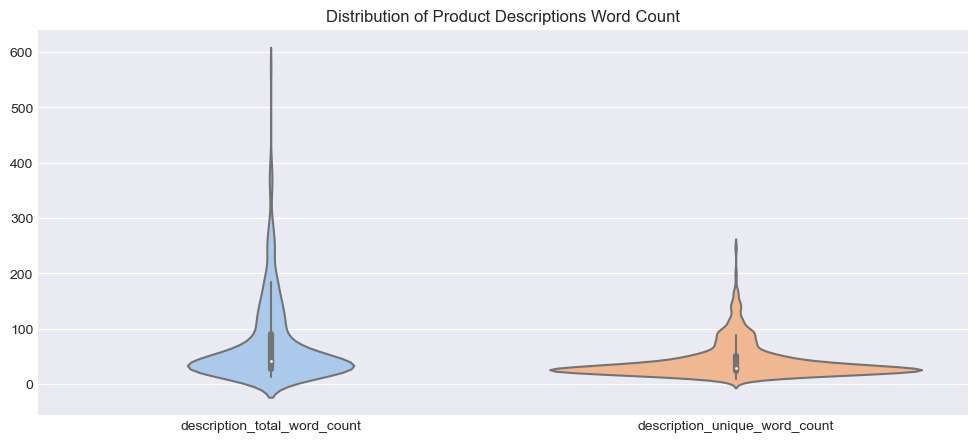

In [344]:
plt.figure(figsize=(12, 5))
sns.violinplot(data[["description_total_word_count", "description_unique_word_count"]])
plt.title("Distribution of Product Descriptions Word Count")
plt.show()

The tokenization helps to easily count the number of total words contained in each description and the number of unique occurences. Most descriptions seem to contain less than 30 unique words and less than 50 total words.

In [345]:
def plot_word_count_by_category(data):
    word_count_by_category = (
        data[
            [
                "description_total_word_count",
                "description_unique_word_count",
                "category",
            ]
        ]
        .groupby("category")
        .mean()
        .sort_values(by="description_total_word_count")
    )

    plt.figure(figsize=(10, 6))
    plt.barh(
        word_count_by_category["description_total_word_count"].index,
        word_count_by_category["description_total_word_count"].values,
        color="#7871AA",
        label="Total Word Count",
    )
    plt.barh(
        word_count_by_category["description_unique_word_count"].index,
        word_count_by_category["description_unique_word_count"].values,
        color="#AA9FB1",
        label="Unique Word Count",
    )
    plt.xlabel("Word Count")
    plt.legend()
    plt.title("Word Count by Category")
    plt.show()

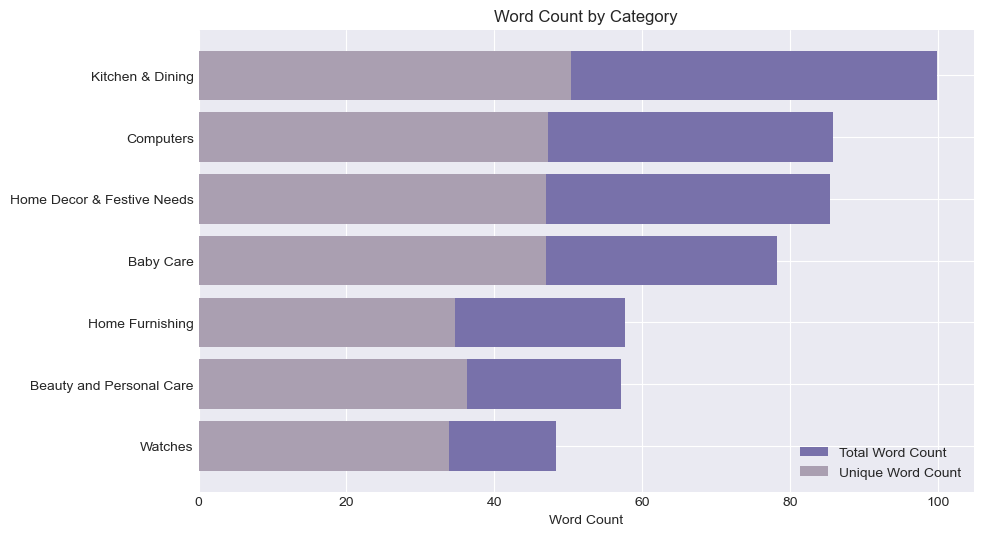

In [346]:
plot_word_count_by_category(data)

The kitchen and dining category seems to have more detailed descriptions as they contain about 100 total words on average and has the highest unique word count. 

Watches on the other hand have more concise descriptions 

### Removing stop words

In [347]:
product_descriptions = data[
    ["tokenized", "description_total_word_count", "description_unique_word_count"]
]
product_descriptions

tokenized  \
0     [key, features, of, elegance, polyester, multi...   
1     [specifications, of, sathiyas, cotton, bath, t...   
2     [key, features, of, eurospa, cotton, terry, fa...   
3     [key, features, of, santosh, royal, fashion, c...   
4     [key, features, of, jaipur, print, cotton, flo...   
...                                                 ...   
1045  [oren, empower, extra, large, self, adhesive, ...   
1046  [wallmantra, large, vinyl, sticker, sticker, p...   
1047  [buy, uberlyfe, extra, large, pigmented, polyv...   
1048  [buy, wallmantra, medium, vinyl, sticker, stic...   
1049  [buy, uberlyfe, large, vinyl, sticker, for, rs...   

      description_total_word_count  description_unique_word_count  
0                              226                            128  
1                               68                             44  
2                              201                            115  
3                              124                             59  
4                              188                             95  
...                            ...                            ...  
1045                           411                            140  
1046                           285                             98  
1047                            35                             27  
1048                            29                             23  
1049                            27                             23  

[1050 rows x 3 columns]

Identifying most frequent words

In [348]:
total_frequency = nltk.Counter()
for key, value in product_descriptions["tokenized"].items():
    total_frequency += nltk.FreqDist(value)

total_frequency_df = pd.DataFrame.from_dict(
    total_frequency, orient="index", columns=["word_count"]
).sort_values(by="word_count", ascending=False)

In [349]:
total_frequency_df

word_count
of                  1757
for                 1447
the                 1369
and                 1332
to                  1058
...                  ...
booking                1
branches               1
hrs                    1
cancellation           1
dried                  1

[5214 rows x 1 columns]

In [350]:
print("There are", total_frequency_df.shape[0], "unique words in the corpus")

There are 5214 unique words in the corpus


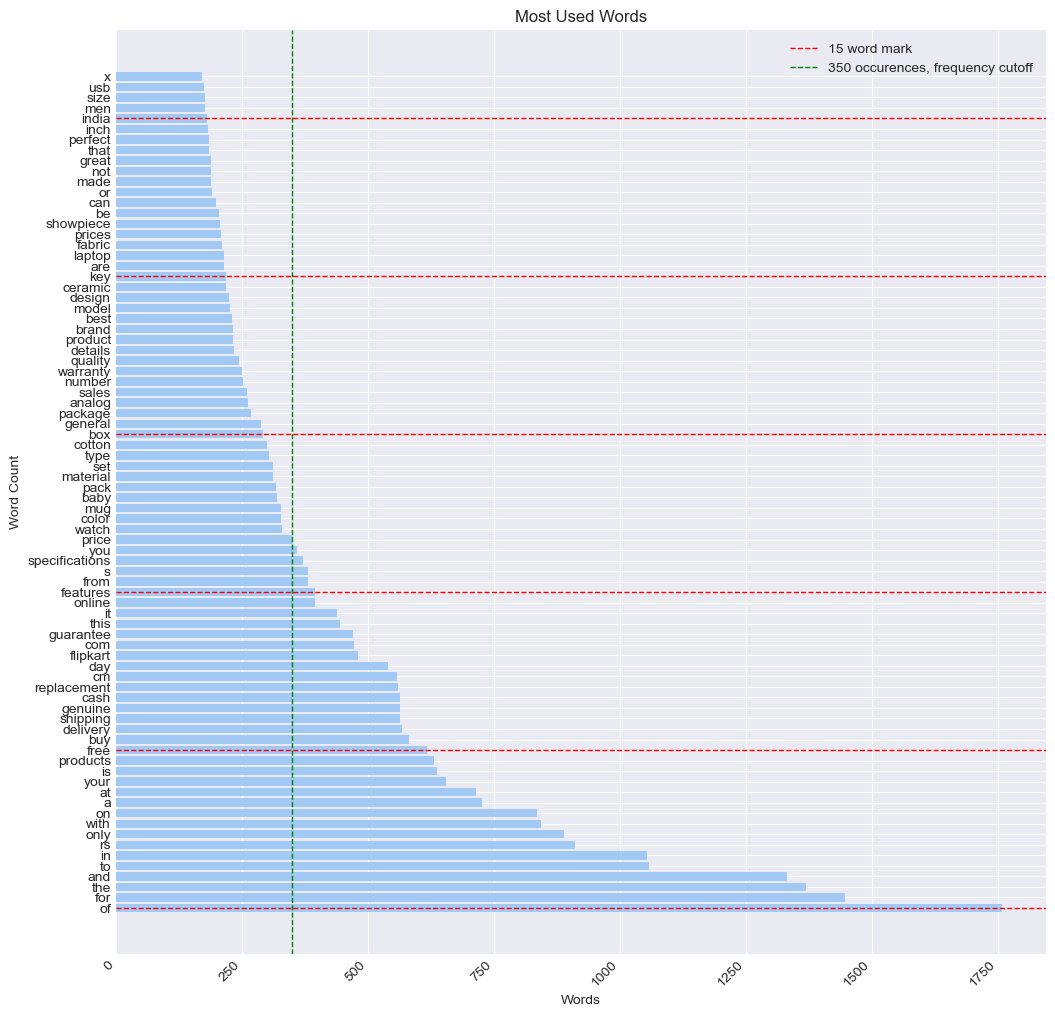

In [351]:
def plot_word_frequency(word_list):
    plt.figure(figsize=(12, 12))
    plt.barh(word_list.index, word_list["word_count"])
    plt.xlabel("Words")
    plt.ylabel("Word Count")
    plt.title("Most Used Words")
    plt.xticks(rotation=45, ha="right")
    for y in range(0, len(word_list), 15):
        plt.axhline(
            y,
            color="red",
            linestyle="--",
            linewidth=1,
            label="15 word mark" if y == 0 else "",
        )
    plt.axvline(
            350,
            color="green",
            linestyle="--",
            linewidth=1,
            label="350 occurences, frequency cutoff",
        )
    plt.legend()
    plt.show()

plot_word_frequency(total_frequency_df.head(80))

The first 35 words, those than occur more than 350 times, can be removed as they do not bring any usefull information and will therefore not help distinguish the products from one another. We will however keep the remaining frequent.

In addition, the common english stopwords will also be removed

In [352]:
stopwords = set()
stopwords.update(total_frequency_df.head(35).index)
stopwords.update(tuple(nltk.corpus.stopwords.words("english")))
print(stopwords)

{'they', "she's", 'features', 'been', 'hadn', 'but', 'in', 'are', 'so', 'cm', 'ours', 'itself', 'didn', 'isn', 'com', 'couldn', 'rs', 'my', 'those', 'being', 'will', 'this', 's', 'if', 'don', 'out', 'such', 'genuine', 'should', "aren't", 'few', 'very', 'above', "isn't", 'as', "shan't", 'flipkart', 'wouldn', 'at', 'her', 'with', 'o', 'needn', 'of', 'and', "you'll", 'weren', 'any', 'won', 'these', 'other', 'herself', 'mightn', 'a', 'ourselves', 'to', 'is', 'how', 'on', 'you', 'while', "don't", 'free', 'only', 'most', 'some', 'doesn', 'mustn', "it's", 'online', 'off', 'hers', 'do', 'during', "doesn't", "you've", 'who', "that'll", "you'd", 'products', 'its', 'both', 'day', 'am', 'further', "couldn't", 'ma', 'yourselves', "didn't", 'replacement', 'has', "shouldn't", 'were', 'from', 'have', 'he', 'theirs', 'them', 'guarantee', 'll', 'y', 'what', 'more', 'your', 'd', "haven't", "weren't", 'there', 'nor', 'here', "wouldn't", 'when', 'shan', 'by', 'me', "hasn't", 'our', 'an', "hadn't", 'against

We will also remove words that only occur less than 3 times for they will not be very useful either.

In [353]:
unique_words = [word for word, count in total_frequency.items() if count <= 5]
print("There are ", len(unique_words), " words that occur less than 3 times")

There are  3740  words that occur less than 3 times


In [354]:
print(unique_words)

['stitch', 'environment', 'romantic', 'loving', 'ant', 'wrinkle', 'shrinkage', 'apparance', 'modernistic', 'surreal', 'attention', 'steal', 'hearts', 'valance', 'slide', 'smoothly', 'draw', 'apart', 'thing', 'welcome', 'sun', 'rays', 'wish', 'close', 'evening', 'moments', 'joyous', 'given', 'soothing', 'softly', 'filters', 'amount', 'sunlight', 'duster', 'sathiyas', 'asvtwl', 'mediam', 'exclusively', 'export', 'texture', 'takes', 'enriched', 'feeling', 'deserve', 'exporting', 'lot', 'renowned', 'last', 'absorbency', 'softness', 'susceptible', 'shuvam', 'pcftsetassorted', 'perfact', 'gifted', 'goldbedi', 'fast', 'machinewash', 'waranty', 'defect', 'onle', 'returne', 'origional', 'maserati', 'camerii', 'wm', 'star', 'uft', 'tsw', 'bk', 'br', 'whether', 'abroad', 'family', 'lifestyle', 'wallets', 'belts', 'sophistication', 'otherwise', 'mundane', 'suave', 'intricately', 'timepieces', 'separate', 'alfajr', 'wy', 'youth', 'azan', 'cities', 'prayer', 'reminders', 'qibla', 'direction', 'hijri

In [355]:
stopwords.update(unique_words)
print("The total stopword count is", len(stopwords), "which means there are", total_frequency_df.shape[0]-len(stopwords), "unique words remaining")

The total stopword count is 3914 which means there are 1300 unique words remaining


In [356]:
def filter_out_stopwords(tokens, sw):
    filtered_tokens = list()
    filtered_tokens += [word for word in tokens if not word in list(sw)]
    return filtered_tokens

In [357]:
data["tokenized"] = data["description"].apply(
    lambda x: filter_out_stopwords(tokenize_description(x), stopwords)
)
data["description_total_word_count"] = data["tokenized"].apply(len)
data["description_unique_word_count"] = data["tokenized"].apply(
    lambda x: unique_word_count(x)
)

In [358]:
data

uniq_id            crawl_timestamp  \
0     55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1     7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2     64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3     d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4     6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   
...                                ...                        ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc  2015-12-01 10:15:43 +0000   
1046  fd6cbcc22efb6b761bd564c28928483c  2015-12-01 10:15:43 +0000   
1047  5912e037d12774bb73a2048f35a00009  2015-12-01 10:15:43 +0000   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6  2015-12-01 10:15:43 +0000   
1049  f2f027ad6a6df617c9f125173da71e44  2015-12-01 10:15:43 +0000   

                                            product_url  \
0     http://www.flipkart.com/elegance-polyester-mul...   
1     http://www.flipkart.com/sathiyas-cotton-bath-t...   
2     http://www.flipkart.com/eurospa-cotton-terry-f...   
3     http://www.flipkart.com/santosh-royal-fashion-...   
4     http://www.flipkart.com/jaipur-print-cotton-fl...   
...                                                 ...   
1045  http://www.flipkart.com/oren-empower-extra-lar...   
1046  http://www.flipkart.com/wallmantra-large-vinyl...   
1047  http://www.flipkart.com/uberlyfe-extra-large-p...   
1048  http://www.flipkart.com/wallmantra-medium-viny...   
1049  http://www.flipkart.com/uberlyfe-large-vinyl-s...   

                                           product_name  \
0     Elegance Polyester Multicolor Abstract Eyelet ...   
1                            Sathiyas Cotton Bath Towel   
2                   Eurospa Cotton Terry Face Towel Set   
3     SANTOSH ROYAL FASHION Cotton Printed King size...   
4     Jaipur Print Cotton Floral King sized Double B...   
...                                                 ...   
1045     Oren Empower Extra Large Self Adhesive Sticker   
1046             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films...   
1048            Wallmantra Medium Vinyl Sticker Sticker   
1049                       Uberlyfe Large Vinyl Sticker   

                                  product_category_tree               pid  \
0     ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   
...                                                 ...               ...   
1045  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE88ZGTX65GH4V   
1046  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZD5GDCVQ   
1047  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE5UVGW2JWVWCT   
1048  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZGFD3RCE   
1049  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE2ZEPACRQJKH7   

      retail_price  discounted_price                                 image  \
0           1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1            600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2              NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3           2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4           2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   
...            ...               ...                                   ...   
1045        1399.0             999.0  958f54f4c46b53c8a0a9b8167d9140bc.jpg   
1046        4930.0            1896.0  fd6cbcc22efb6b761bd564c28928483c.jpg   
1047        4500.0            1449.0  5912e037d12774bb73a2048f35a00009.jpg   
1048        3465.0            1333.0  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg   
1

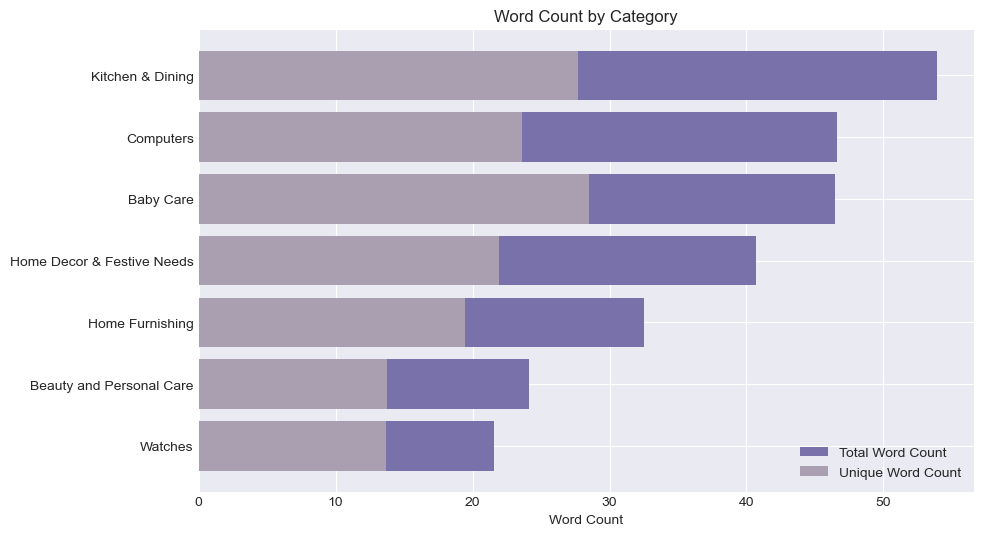

In [359]:
plot_word_count_by_category(data)

When filtering out stopwords, computers have longer descriptions on average than home decor objects. Baby care products have descriptions with the highest unique word count.

### Lemmatization

In [360]:
def tokenize_description(description):
    lemmatizer = WordNetLemmatizer()
    filtered_tokens = list()

    tokenizer = nltk.RegexpTokenizer(r"[a-zA-Z]+")
    tokens = tokenizer.tokenize(description.lower())

    filtered_tokens += [
        lemmatizer.lemmatize(word) for word in tokens if word not in list(stopwords)
    ]
    return [word for word in filtered_tokens if len(word) > 2]

In [361]:
data["tokenized"] = data["description"].apply(lambda x: tokenize_description(x))
data["description_total_word_count"] = data["tokenized"].apply(len)
data["description_unique_word_count"] = data["tokenized"].apply(
    lambda x: unique_word_count(x)
)

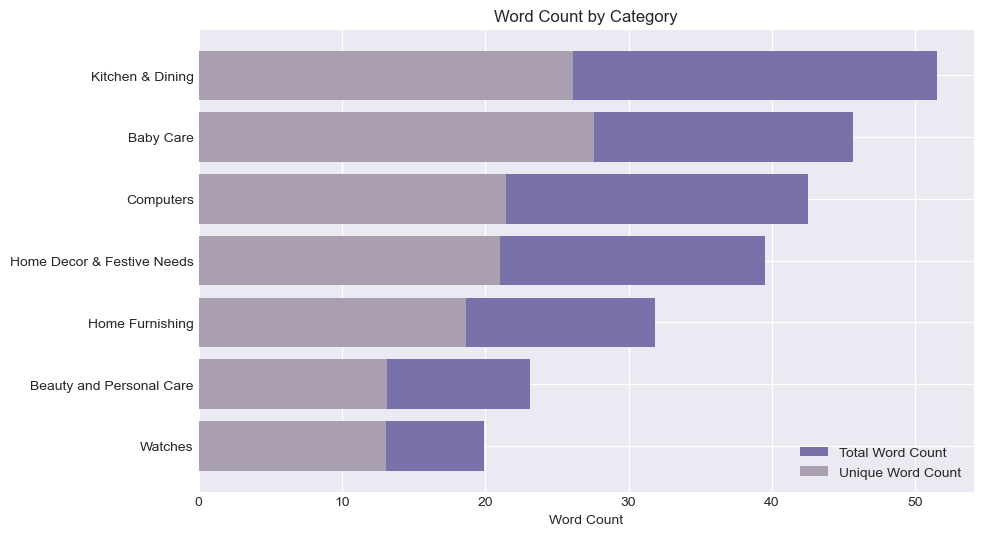

In [362]:
plot_word_count_by_category(data)

### Preprocess descriptions

In [363]:
def tokenize(description):
    tokenizer = nltk.RegexpTokenizer(r"[a-zA-Z]+")
    return tokenizer.tokenize(description.lower())


def remove_stopwords(tokens):
    return [word for word in tokens if word not in stopwords]


def word_check(tokens):
    valid_words_dictionary = set(nltk.corpus.words.words())
    return [word for word in tokens if word in valid_words_dictionary]


def lemmatize(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in tokens]


def form_sentence(tokens, min_length=2):
    return " ".join(word for word in tokens if len(word) > min_length)

In [364]:
def full_preprocessing(description):
    tokens = tokenize(description)
    tokens_without_stopwords = remove_stopwords(tokens)
    lemmatized_tokens = lemmatize(tokens_without_stopwords)
    valid_tokens = word_check(lemmatized_tokens)
    return form_sentence(valid_tokens)


def full_preprocessing_without_word_check(description):
    tokens = tokenize(description)
    tokens_without_stopwords = remove_stopwords(tokens)
    lemmatized_tokens = lemmatize(tokens_without_stopwords)
    return form_sentence(lemmatized_tokens)


def simple_preprocessing(description):
    tokens = tokenize(description)
    lemmatized_tokens = lemmatize(tokens)
    valid_tokens = word_check(lemmatized_tokens)
    return form_sentence(valid_tokens, 1)

def simple_preprocessing_without_word_check(description):
    tokens = tokenize(description)
    lemmatized_tokens = lemmatize(tokens)
    return form_sentence(lemmatized_tokens, 1)

In [365]:
print(data.description[15])
print("\n")
print(full_preprocessing(data.description[15]))
print("\n")
print(full_preprocessing_without_word_check(data.description[15]))
print("\n")
print(simple_preprocessing(data.description[15]))
print("\n")
print(simple_preprocessing_without_word_check(data.description[15]))

Escort E-1700-906_Blk Analog Watch  - For Men, Boys
                         Price: Rs. 1,829
				
			If you have it, flaunt it! If this is your mantra then hit the streets in style wearing this black coloured analog watch for men from the house of Escort. The casing adds more appeal to this timepiece that can be worn on a rainy day, all thanks to its water resistance upto 10 atm.
If you have it, flaunt it! If this is your mantra then hit the streets in style wearing this black coloured analog watch for men from the house of Escort. The casing adds more appeal to this timepiece that can be worn on a rainy day, all thanks to its water resistance upto 10 atm.


watch men boy price style black watch men house add appeal water style black watch men house add appeal water


analog watch men boy price style black coloured analog watch men house add appeal water style black coloured analog watch men house add appeal water


escort watch for men boy price if you have it flaunt it if this is yo

In [366]:
data["full_preprocessing"] = data["description"].apply(lambda x: full_preprocessing(x))
data["full_without_word_check"] = data["description"].apply(
    lambda x: full_preprocessing_without_word_check(x)
)
data["simple_preprocessing"] = data["description"].apply(
    lambda x: simple_preprocessing(x)
)
data["simple_without_word_check"] = data["description"].apply(
    lambda x: simple_preprocessing_without_word_check(x)
)

In [367]:
text_data = data[
    [
        "category",
        "encoded_category",
        "description",
        "full_preprocessing",
        "full_without_word_check",
        "simple_preprocessing",
        "simple_without_word_check",
    ]
]
text_data

category  encoded_category  \
0     Home Furnishing                 4   
1           Baby Care                 0   
2           Baby Care                 0   
3     Home Furnishing                 4   
4     Home Furnishing                 4   
...               ...               ...   
1045        Baby Care                 0   
1046        Baby Care                 0   
1047        Baby Care                 0   
1048        Baby Care                 0   
1049        Baby Care                 0   

                                            description  \
0     Key Features of Elegance Polyester Multicolor ...   
1     Specifications of Sathiyas Cotton Bath Towel (...   
2     Key Features of Eurospa Cotton Terry Face Towe...   
3     Key Features of SANTOSH ROYAL FASHION Cotton P...   
4     Key Features of Jaipur Print Cotton Floral Kin...   
...                                                 ...   
1045  Oren Empower Extra Large Self Adhesive Sticker...   
1046  Wallmantra Large Vinyl Sticker Sticker (Pack o...   
1047  Buy Uberlyfe Extra Large Pigmented Polyvinyl F...   
1048  Buy Wallmantra Medium Vinyl Sticker Sticker fo...   
1049  Buy Uberlyfe Large Vinyl Sticker for Rs.595 on...   

                                     full_preprocessing  \
0     key elegance polyester multicolor abstract eye...   
1     cotton bath towel bath towel red yellow blue b...   
2     key cotton terry face towel set size small hei...   
3     key royal fashion cotton printed king sized do...   
4     key print cotton floral king sized double cott...   
...                                                 ...   
1045  extra large self adhesive sticker pack price d...   
1046  large vinyl sticker sticker pack price bring h...   
1047  extra large sticker extra large sticker best p...   
1048  medium vinyl sticker sticker medium vinyl stic...   
1049  large vinyl sticker large vinyl sticker best p...   

                                full_without_word_check  \
0     key elegance polyester multicolor abstract eye...   
1     cotton bath towel bath towel red yellow blue b...   
2     key eurospa cotton terry face towel set size s...   
3     key santosh royal fashion cotton printed king ...   
4     key jaipur print cotton floral king sized doub...   
...                                                 ...   
1045  extra large self adhesive sticker pack price d...   
1046  wallmantra large vinyl sticker sticker pack pr...   
1047  extra large imported sticker extra large impor...   
1048  wallmantra medium vinyl sticker sticker wallma...   
1049  large vinyl sticker large vinyl sticker best p...   

                                   simple_preprocessing  \
0     key feature of elegance polyester multicolor a...   
1     specification of cotton bath towel bath towel ...   
2     key feature of cotton terry face towel set siz...   
3     key feature of royal fashion cotton printed ki...   
4     key feature of print cotton floral king sized ...   
...                                                 ...   
1045  empower extra large self adhesive sticker pack...   
1046  large vinyl sticker sticker pack of price brin...   
1047  buy extra large polyvinyl film sticker for ext...   
1048  buy medium vinyl sticker sticker for medium vi...   
1049  buy large vinyl sticker for large vinyl sticke...   

                              simple_without_word_check  
0     key feature of elegance polyester multicolor a...  
1     specification of sathiyas cotton bath towel ba...  
2     key feature of eurospa cotton terry face towel...  
3     key feature of santosh royal fashion cotton pr...  
4     key feature of jaipur print cotton floral king...  
...                                                 ...  
1045  oren empower extra large self adhesive sticker...  
1046  wallmantra large vinyl sticker sticker pack of...  
1047  buy uberlyfe extra large pigmented polyvinyl f...  
1048  buy wallmantra medium vinyl sticker sticker fo...  
1049  buy uberlyfe lar

## Bag of Words

In [368]:
def get_tsne_data(values):
    tsne = manifold.TSNE(
        n_components=2, perplexity=30, n_iter=2000, init="random", random_state=42
    )
    X_tsne = tsne.fit_transform(values)
    df_tsne = pd.DataFrame(X_tsne[:, 0:2], columns=["tsne1", "tsne2"])
    df_tsne["category"] = data["category"]
    return X_tsne, df_tsne


def get_kmeans_labels(values):
    kmeans = KMeans(n_clusters=7, random_state=42, n_init="auto")
    return kmeans.fit(values).labels_

def get_ari(true_labels, predicted_labels):
    return np.round(adjusted_rand_score(true_labels, predicted_labels), 2)

def pca_reduction(values):
    print("Dataset dimension before PCA: ", values.shape)
    pca = decomposition.PCA(n_components=0.99)
    pca_features = pca.fit_transform(values)
    print("Dataset dimension after PCA: ", pca_features.shape)
    
    return pca_features

In [369]:
def plot_tsne(df_tsne, predicted_labels):
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    sns.scatterplot(
        x="tsne1",
        y="tsne2",
        hue=df_tsne["category"],
        data=df_tsne,
        s=50,
        alpha=0.6,
        palette=sns.color_palette("tab10", n_colors=7),
        ax=axes[0],
    )
    axes[0].set_title("TSNE by True Categories")
    axes[0].legend(prop={"size": 10}, bbox_to_anchor=(1, 1))

    sns.scatterplot(
        x="tsne1",
        y="tsne2",
        hue=predicted_labels,
        data=df_tsne,
        s=50,
        alpha=0.6,
        palette=sns.color_palette("tab10", n_colors=7),
        ax=axes[1],
    )
    axes[1].set_title("TSNE by Kmeans Labels")
    axes[1].legend(prop={"size": 12}, bbox_to_anchor=(1, 1))

    plt.tight_layout()
    plt.show()

In [370]:
summary = pd.DataFrame()

def summerize_results(model, preprocessing, ari, summary):
    results = {
        "Model": model,
        "Preprocessing": preprocessing,
        "ARI": ari,
    }

    return pd.concat(
        [summary, pd.DataFrame(results, index=[0])], ignore_index=True
    ).sort_values(by="ARI", ascending=False)

In [371]:
def evaluate_model(values, model_name, preprocessing_type, summary): 
    X_tsne, df_tsne = get_tsne_data(values)
    predicted_labels = get_kmeans_labels(X_tsne)

    plot_tsne(df_tsne, predicted_labels)

    ari = get_ari(data['category'], predicted_labels)

    print("The Adjusted Rand Index is: ", ari)

    return summerize_results(model_name, preprocessing_type, ari, summary)


### CountVectorizer

With full preprocessing
- lower case 
- stopword removal (most and less frequent)
- invalid word removal (based on nlkr words)
- lemmatization

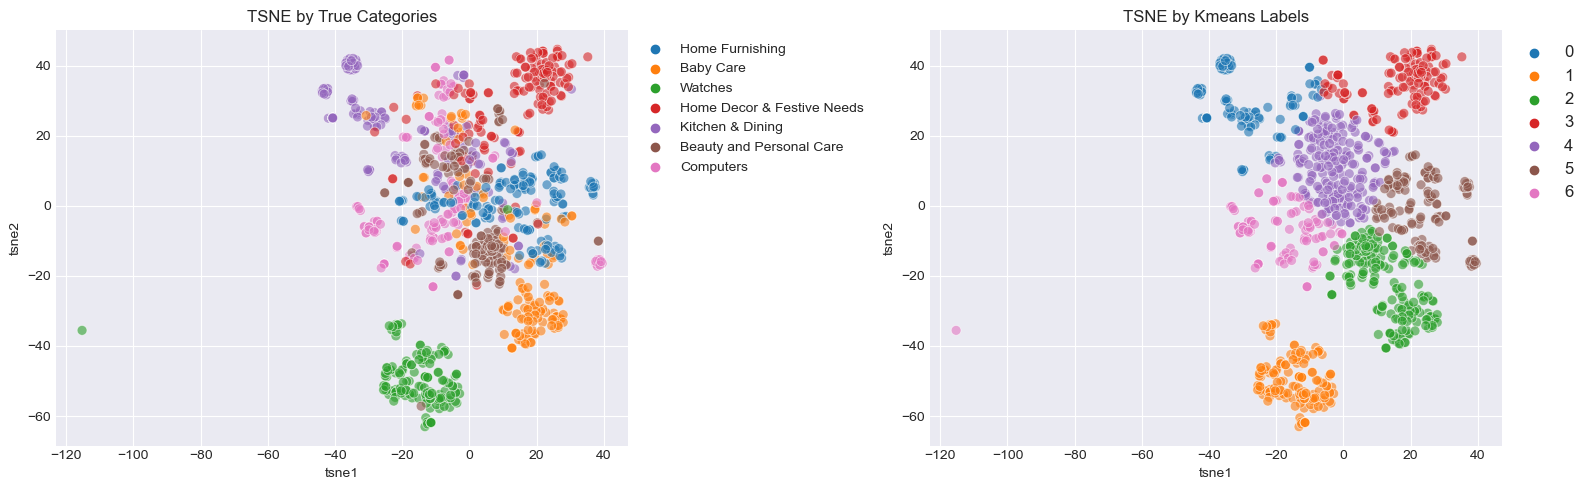

The Adjusted Rand Index is:  0.38


In [372]:
count_vectorizer = CountVectorizer()
summary = evaluate_model(count_vectorizer.fit_transform(text_data["full_preprocessing"]), 'CountVectorizer', 'Full', summary)

With preprocessing without word check
- lower case 
- stopword removal (most and less frequent)
- lemmatization

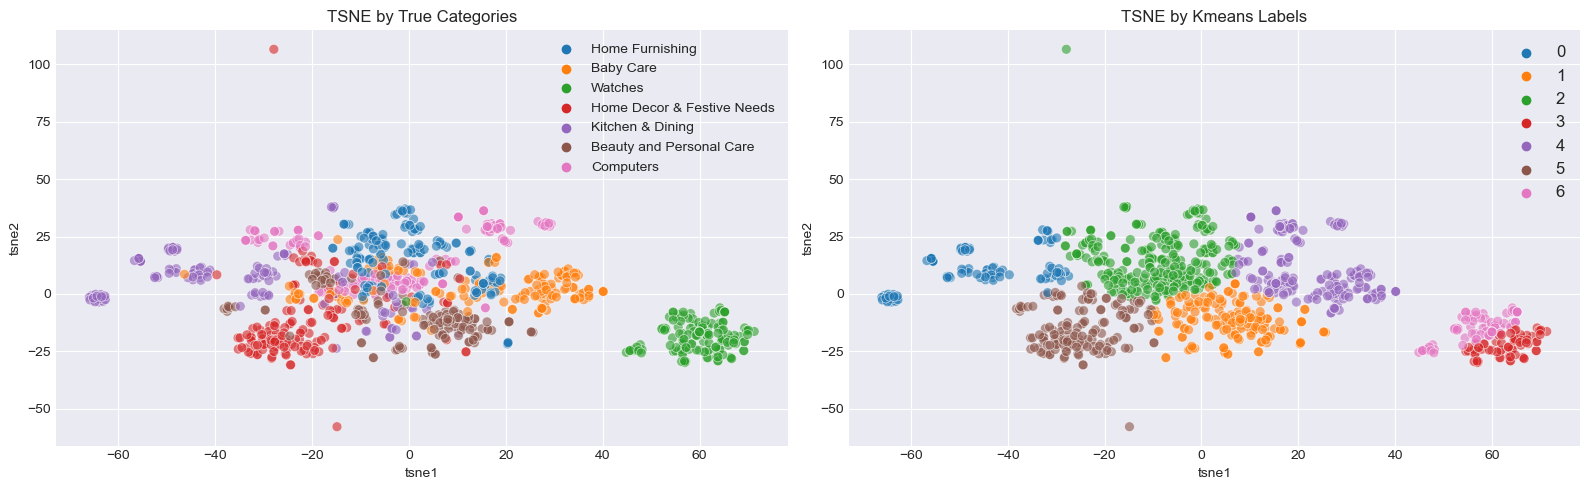

The Adjusted Rand Index is:  0.35


In [373]:
count_vectorizer = CountVectorizer()
summary = evaluate_model(count_vectorizer.fit_transform(text_data["full_without_word_check"]), 'CountVectorizer', 'Full Without Word Check', summary)

In [374]:
summary

Model            Preprocessing   ARI
0  CountVectorizer                     Full  0.38
1  CountVectorizer  Full Without Word Check  0.35

The count vectorizer does not provide clear clusters when plotting the products according to their true categories. The kMeans yields distinct clusters but the ari of .26 illustrates that they are quite different from the clusters by category.

### TF-IDF

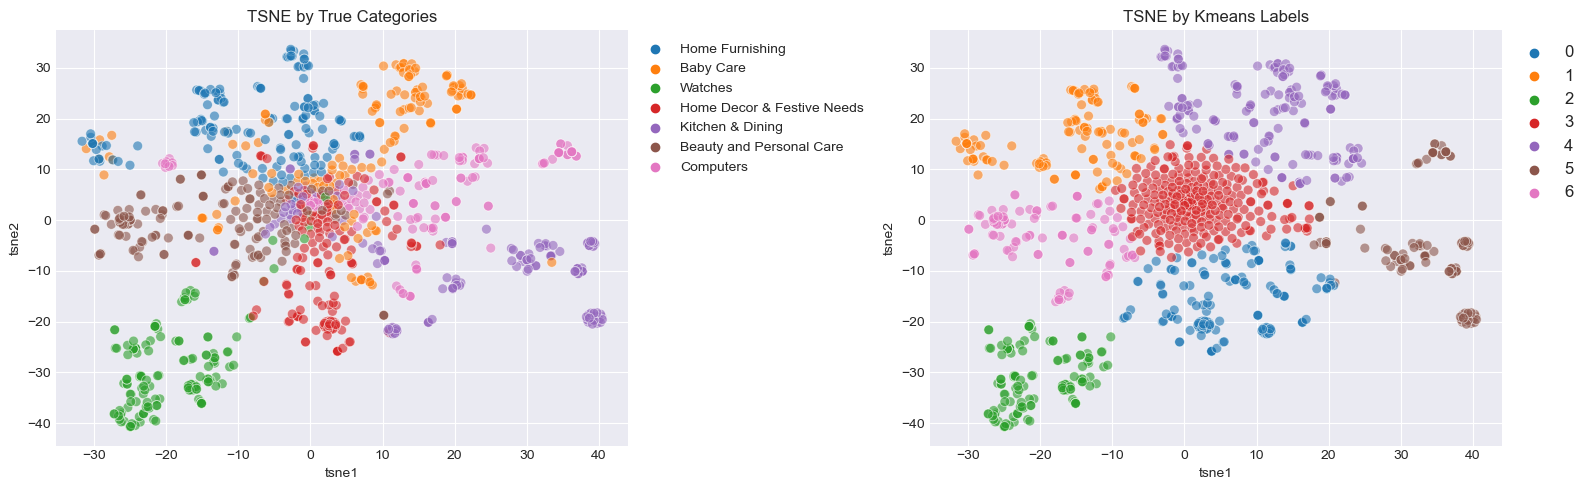

The Adjusted Rand Index is:  0.31


In [375]:
tfidf = TfidfVectorizer()
tfidf_values = tfidf.fit_transform(text_data["full_preprocessing"])
summary = evaluate_model(tfidf_values, 'TF-IDF', 'Full', summary)

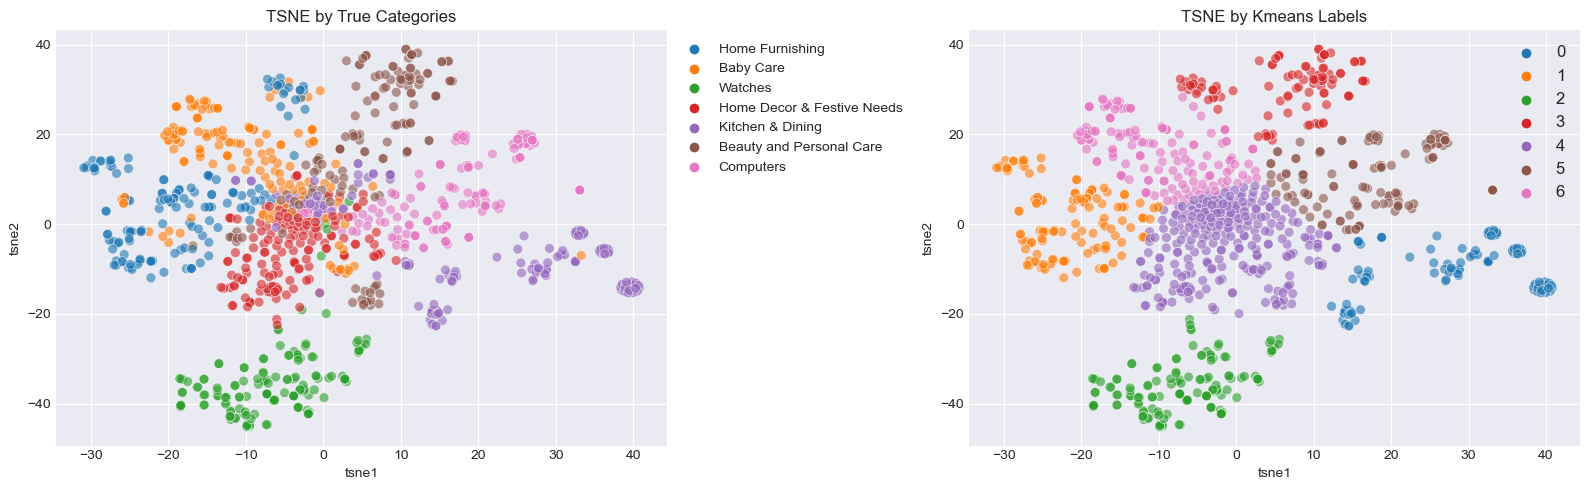

The Adjusted Rand Index is:  0.5


In [376]:
tfidf = TfidfVectorizer()
tfidf_values = tfidf.fit_transform(text_data["full_without_word_check"])
summary = evaluate_model(tfidf_values, 'TF-IDF', 'Full Without Word Check', summary)

In [377]:
summary

Model            Preprocessing   ARI
3           TF-IDF  Full Without Word Check  0.50
0  CountVectorizer                     Full  0.38
1  CountVectorizer  Full Without Word Check  0.35
2           TF-IDF                     Full  0.31

There is a big difference in ARI values when the data has been preprocessed with and without word check. The score without the word check being much higher, we can assume that the word dictionary used might not contain words that are domain specific and thus remove important words. 

Nevertheless, these results support the feasability of a classification engine as we can see distinct clusters that are quite similar to the clusters from the true categories. 
Cluster 3, for example, which represents the watches category, is quite distinct, as well as cluster 4, home decor. 

The ARI of .5 matches with the visual representations of the clusters and also supports the feasability of the classification engine. 

SVM

In [378]:
len(tfidf.vocabulary_)

1200

In [379]:
df_svm = pd.DataFrame(
    tfidf_values.todense().tolist(),
    columns=tfidf.get_feature_names_out(),
)
df_svm

aapno  abkl  able  absorbent  abstract  accessory  actual  adapter  \
0       0.0   0.0   0.0        0.0  0.190915        0.0     0.0      0.0   
1       0.0   0.0   0.0        0.0  0.000000        0.0     0.0      0.0   
2       0.0   0.0   0.0        0.0  0.000000        0.0     0.0      0.0   
3       0.0   0.0   0.0        0.0  0.000000        0.0     0.0      0.0   
4       0.0   0.0   0.0        0.0  0.000000        0.0     0.0      0.0   
...     ...   ...   ...        ...       ...        ...     ...      ...   
1045    0.0   0.0   0.0        0.0  0.000000        0.0     0.0      0.0   
1046    0.0   0.0   0.0        0.0  0.000000        0.0     0.0      0.0   
1047    0.0   0.0   0.0        0.0  0.000000        0.0     0.0      0.0   
1048    0.0   0.0   0.0        0.0  0.000000        0.0     0.0      0.0   
1049    0.0   0.0   0.0        0.0  0.000000        0.0     0.0      0.0   

      adaptor  add  ...  woven  wow  wrap  wrapped  yarn      year    yellow  \
0         0.0  0.0  ...    0.0  0.0   0.0      0.0   0.0  0.000000  0.000000   
1         0.0  0.0  ...    0.0  0.0   0.0      0.0   0.0  0.000000  0.197218   
2         0.0  0.0  ...    0.0  0.0   0.0      0.0   0.0  0.042526  0.000000   
3         0.0  0.0  ...    0.0  0.0   0.0      0.0   0.0  0.000000  0.000000   
4         0.0  0.0  ...    0.0  0.0   0.0      0.0   0.0  0.000000  0.000000   
...       ...  ...  ...    ...  ...   ...      ...   ...       ...       ...   
1045      0.0  0.0  ...    0.0  0.0   0.0      0.0   0.0  0.000000  0.000000   
1046      0.0  0.0  ...    0.0  0.0   0.0      0.0   0.0  0.000000  0.000000   
1047      0.0  0.0  ...    0.0  0.0   0.0      0.0   0.0  0.000000  0.000000   
1048      0.0  0.0  ...    0.0  0.0   0.0      0.0   0.0  0.000000  0.000000   
1049      0.0  0.0  ...    0.0  0.0   0.0      0.0   0.0  0.000000  0.000000   

           yes  yet  youthful  
0     0.000000  0.0       0.0  
1     0.077282  0.0       0.0  
2     0.000000  0.0       0.0  
3     0.043337  0.0       0.0  
4     0.035298  0.0       0.0  
...        ...  ...       ...  
1045  0.000000  0.0       0.0  
1046  0.000000  0.0       0.0  
1047  0.000000  0.0       0.0  
1048  0.000000  0.0       0.0  
1049  0.000000  0.0       0.0  

[1050 rows x 1200 columns]

In [380]:
X_train, X_test, y_train, y_test = train_test_split(
    df_svm, data.encoded_category, test_size=0.2
)

svc = LinearSVC()
svc.fit(X_train, y_train)
y_predicted = svc.predict(X_test)

encoded_categories = data.groupby("category").first().reset_index()
results = pd.DataFrame(
    f1_score(y_test, y_predicted, average=None), columns=["F1 Score"]
)
results["Category"] = encoded_categories.category
results

F1 Score                    Category
0  0.830769                   Baby Care
1  0.918033    Beauty and Personal Care
2  0.985507                   Computers
3  0.933333  Home Decor & Festive Needs
4  0.923077             Home Furnishing
5  0.900000            Kitchen & Dining
6  1.000000                     Watches

In [381]:
adjusted_rand_score(y_test, y_predicted)

0.8466922018393441

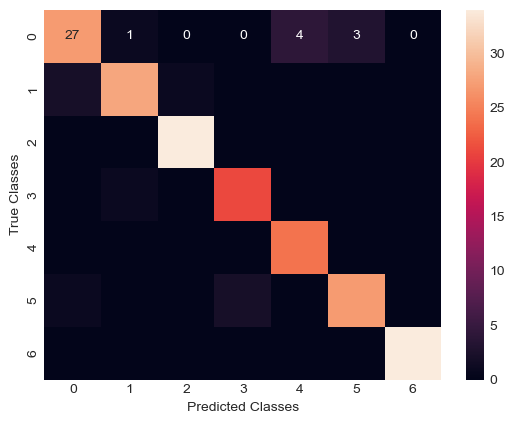

In [382]:
sns.heatmap(confusion_matrix(y_test, y_predicted), annot=True)
plt.ylabel("True Classes")
plt.xlabel("Predicted Classes")
plt.show()

The results of the SVM model yield good results and illustrate the feasability of the classification engine based on the product's descriptions. 

Latent Dirichlet Allocation

In [383]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(
    n_components=7,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=42,
)

lda.fit(tfidf_values)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=7, random_state=42)

In [384]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(
            " ".join(
                [feature_names[i] for i in topic.argsort()[: -no_top_words - 1 : -1]]
            )
        )


no_top_words = 10
display_topics(lda, tfidf.get_feature_names_out(), no_top_words)

Topic 0:
oxyglow massage vitamin cream fruit apple range extender beauty face
Topic 1:
baby polyester eyelet girl detail fabric curtain aroma comfort cotton
Topic 2:
mug ceramic kadhai coffee prithish best perfect sticker price design
Topic 3:
lowest tenda spf adapter pizza price cutter steel warranty battery
Topic 4:
watch analog men discount india great woman sonata dial strap
Topic 5:
sticker vinyl wallmantra medium wall cushion large cover best small
Topic 6:
set combo showpiece laptop skin best multicolor towel price usb


The topics generated by the LDA model are hard to interpret and distinguish from one another

## Word Embedding

### Word2Vec

Training own model

In [385]:
def train_word2vec(data):
    model = gensim.models.Word2Vec(min_count=5, window=10, seed=42, vector_size=300)
    sentences = [gensim.utils.simple_preprocess(text) for text in data]
    model.build_vocab(sentences)
    model.train(sentences, total_examples=model.corpus_count, epochs=100)
    max_sentence_length = max(len(sentence) for sentence in sentences)
    print(model.vector_size)
    return model, sentences, max_sentence_length

In [386]:
model_full_preprocessing, sentences, max_sentence_length = train_word2vec(
    text_data["full_preprocessing"]
)
print("Computer: ", model_full_preprocessing.wv.most_similar("computer"))
print("Curtain: ", model_full_preprocessing.wv.most_similar("curtain"))

300
Computer:  [('attachment', 0.8287269473075867), ('vacuum', 0.8250448703765869), ('connect', 0.6998386979103088), ('cleaning', 0.6712527275085449), ('port', 0.6653835773468018), ('device', 0.6410741806030273), ('cleaner', 0.603408694267273), ('air', 0.5753878951072693), ('dust', 0.5483654141426086), ('side', 0.5409575700759888)]
Curtain:  [('eyelet', 0.5803942680358887), ('door', 0.5733515620231628), ('maroon', 0.5070887804031372), ('window', 0.4384862184524536), ('comfort', 0.4188224673271179), ('elegance', 0.4043048322200775), ('appeal', 0.3975484371185303), ('vibrant', 0.39371129870414734), ('leave', 0.3896545171737671), ('abstract', 0.37041160464286804)]


In [387]:
print(model_full_preprocessing.wv.similarity(w1="home", w2="furnishing"))
print(model_full_preprocessing.wv.similarity(w1="watch", w2="computer"))

0.27150407
-0.11065532


In [388]:
for index, word in enumerate(model_full_preprocessing.wv.index_to_key):
    if index == 20:
        break
    print(f"word #{index}/{len(model_full_preprocessing.wv.index_to_key)} is {word}")

word #0/998 is price
word #1/998 is mug
word #2/998 is color
word #3/998 is watch
word #4/998 is type
word #5/998 is baby
word #6/998 is pack
word #7/998 is material
word #8/998 is set
word #9/998 is cotton
word #10/998 is box
word #11/998 is general
word #12/998 is design
word #13/998 is package
word #14/998 is sale
word #15/998 is number
word #16/998 is warranty
word #17/998 is quality
word #18/998 is detail
word #19/998 is girl


Evaluating semantic similarities using the academic dataset WS-353

In [389]:
model_full_preprocessing.wv.evaluate_word_pairs(datapath("wordsim353.tsv"))

(PearsonRResult(statistic=0.18689842953254848, pvalue=0.4882490086826014),
 SignificanceResult(statistic=0.18235294117647058, pvalue=0.49907485724580003),
 95.46742209631728)

Creating padded sequences from tokenized descriptions

In [390]:
def get_padded_sequences(sentences):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(sentences)
    x_sentences = pad_sequences(
        tokenizer.texts_to_sequences(sentences),
        maxlen=max_sentence_length,
        padding="post",
    )

    num_words = len(tokenizer.word_index) + 1
    print("Number of unique words: %i" % num_words)
    
    return x_sentences, tokenizer


def create_embedding_model(model, tokenizer, max_sentence_length):
    w2v_size = model.wv.vector_size
    word_index = tokenizer.word_index
    vocab_size = len(word_index) + 1
    embedding_matrix = np.zeros((vocab_size, w2v_size))
    i = 0
    j = 0

    for word, idx in word_index.items():
        i += 1
        if word in model.wv.index_to_key:
            j += 1
            embedding_vector = model.wv[word]
            if embedding_vector is not None:
                embedding_matrix[idx] = model.wv[word]

    word_rate = np.round(j / i, 4)
    print("Word embedding rate : ", word_rate)
    print("Embedding matrix: %s" % str(embedding_matrix.shape))

    word_input = Input(shape=(max_sentence_length,), dtype="float64")
    word_embedding = Embedding(
        input_dim=vocab_size,
        output_dim=w2v_size,
        weights=[embedding_matrix],
        input_length=max_sentence_length,
    )(word_input)
    word_vec = GlobalAveragePooling1D()(word_embedding)
    embed_model = Model([word_input], word_vec)
    print(embed_model.summary())

    return embed_model

In [391]:
sequences, tokenizer = get_padded_sequences(sentences)
embed_model = create_embedding_model(
    model_full_preprocessing, tokenizer, max_sentence_length
)

Number of unique words: 999
Word embedding rate :  1.0
Embedding matrix: (999, 300)
Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 260)]             0         
                                                                 
 embedding_4 (Embedding)     (None, 260, 300)          299700    
                                                                 
 global_average_pooling1d_4   (None, 300)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
Total params: 299,700
Trainable params: 299,700
Non-trainable params: 0
_________________________________________________________________
None


33/33 [==============================] - 0s 2ms/step


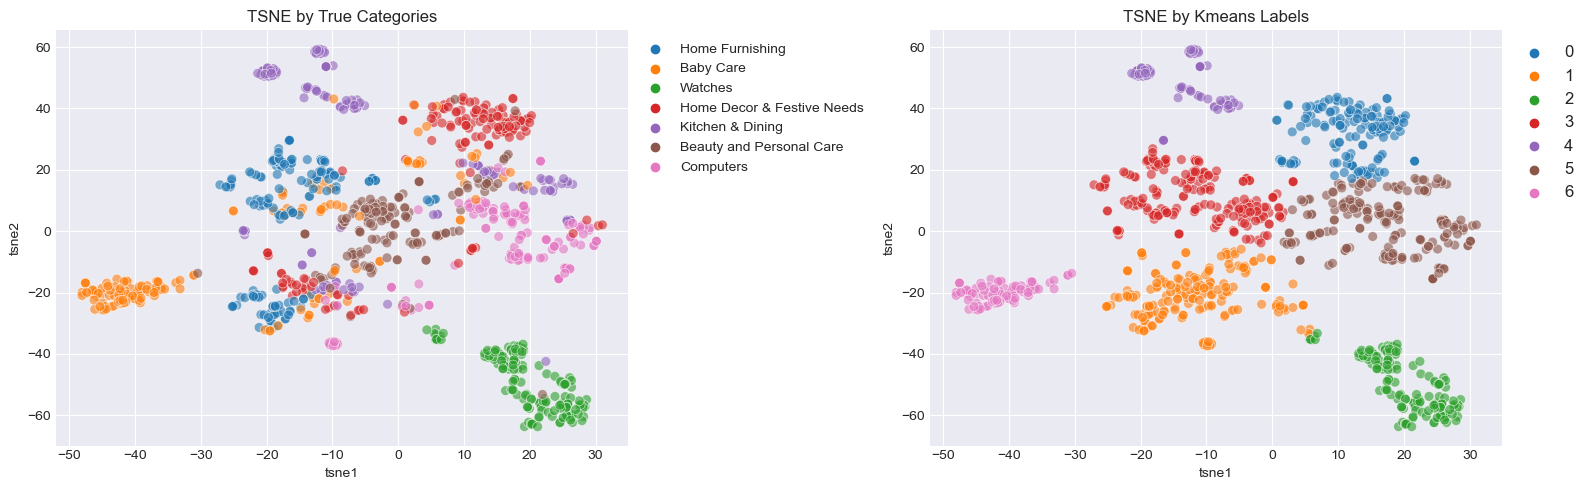

The Adjusted Rand Index is:  0.4


In [392]:
summary = evaluate_model(embed_model.predict(sequences), 'Word2Vec', 'Full', summary)

In [393]:
model_full_preprocessing, sentences, max_sentence_length = train_word2vec(
    text_data["full_without_word_check"]
)
sequences, tokenizer = get_padded_sequences(sentences)
embed_model = create_embedding_model(
    model_full_preprocessing, tokenizer, max_sentence_length
)

300
Number of unique words: 1201
Word embedding rate :  1.0
Embedding matrix: (1201, 300)
Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 269)]             0         
                                                                 
 embedding_5 (Embedding)     (None, 269, 300)          360300    
                                                                 
 global_average_pooling1d_5   (None, 300)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
Total params: 360,300
Trainable params: 360,300
Non-trainable params: 0
_________________________________________________________________
None


33/33 [==============================] - 0s 1ms/step


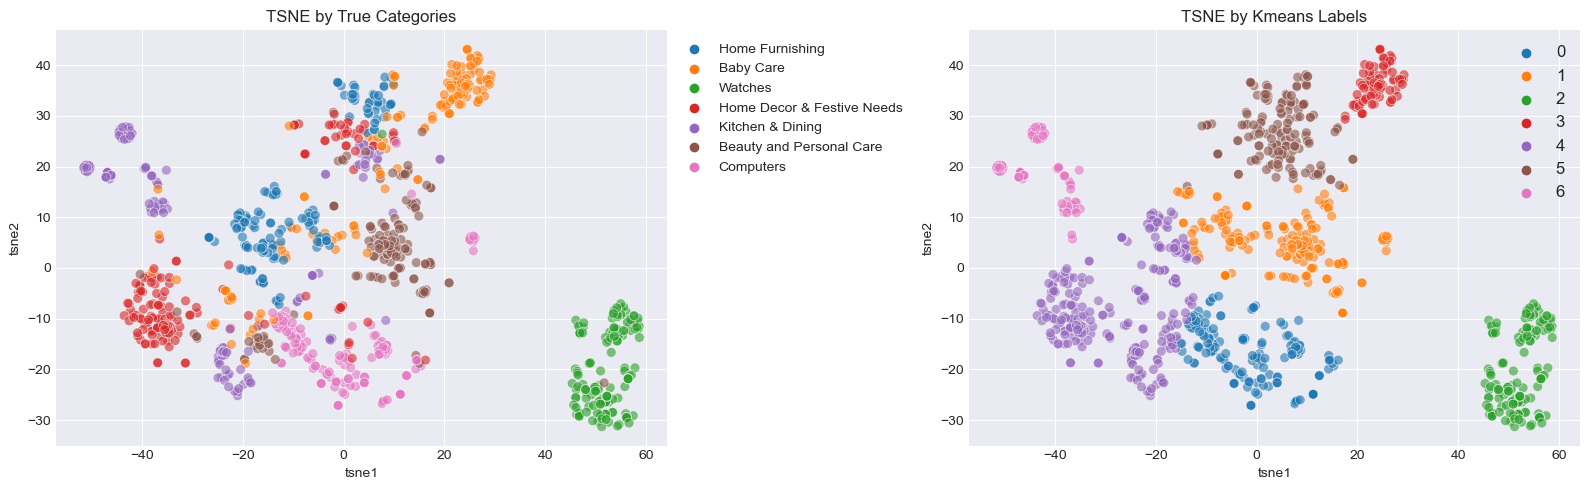

The Adjusted Rand Index is:  0.43


In [394]:
summary = evaluate_model(embed_model.predict(sequences), 'Word2Vec', 'Full Without Word Check', summary)

In [395]:
summary

Model            Preprocessing   ARI
0           TF-IDF  Full Without Word Check  0.50
5         Word2Vec  Full Without Word Check  0.43
1         Word2Vec                     Full  0.40
2  CountVectorizer                     Full  0.38
3  CountVectorizer  Full Without Word Check  0.35
4           TF-IDF                     Full  0.31

## Pretrained Models

### BERT

In [450]:
import transformers
from transformers import pipeline, BertTokenizer, TFBertModel, TFAutoModel, DistilBertTokenizer, TFDistilBertModel, TFDistilBertForSequenceClassification
from sentence_transformers import SentenceTransformer
from transformers import TFAutoModelForTokenClassification

Pretrained Model : bert-base-uncased

In [397]:
def use_bert_model(model, data):
    tokenizer = BertTokenizer.from_pretrained(model)
    model = TFBertModel.from_pretrained(model)
    encoded_input = tokenizer(
        list(data), return_tensors="tf", padding="max_length", truncation=True, max_length = 200,
    )
    output = model(encoded_input)
    return np.array(output.last_hidden_state).mean(axis=1)

In [398]:
output = use_bert_model("bert-base-uncased", text_data["simple_preprocessing"])

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

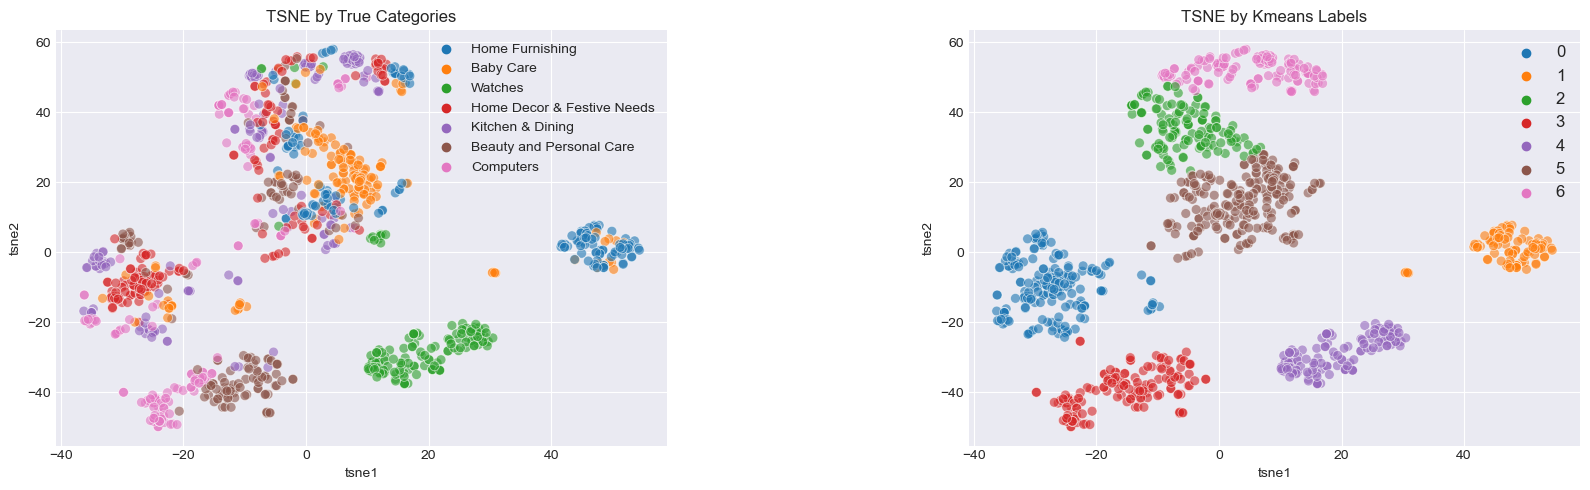

The Adjusted Rand Index is:  0.28


In [399]:
summary = evaluate_model(output, 'BERT (bert-base-uncased)', 'Simple', summary)

In [400]:
output = use_bert_model("bert-base-uncased", text_data["simple_without_word_check"])

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

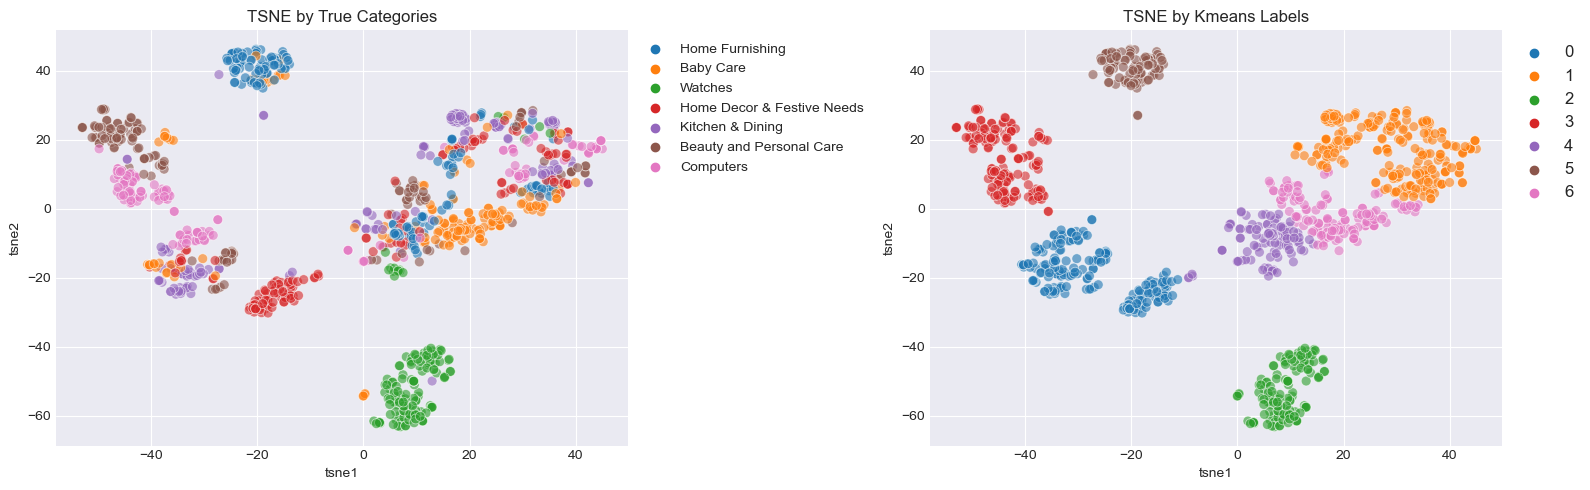

The Adjusted Rand Index is:  0.29


In [401]:
summary = evaluate_model(output, 'BERT (bert-base-uncased)', 'Simple Without Word Check', summary)

Pretrained Model: cnicu/product_classifier

In [457]:
def use_distilbert_model(model, data):
    tokenizer = DistilBertTokenizer.from_pretrained(model)
    model = TFDistilBertForSequenceClassification.from_pretrained(model, from_pt=True, output_hidden_states=True)
    # model = TFDistilBertModel.from_pretrained(model, from_pt=True)
    encoded_input = tokenizer(
        list(data), return_tensors="tf", padding="max_length", truncation=True, max_length = 200,
    )
    output = model(encoded_input)
    return np.array(output.hidden_states[-1]).mean(axis=1)
    # return np.array(output.last_hidden_state).mean(axis=1)

In [458]:
output = use_distilbert_model("cnicu/product_classifier", text_data["simple_preprocessing"])

All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


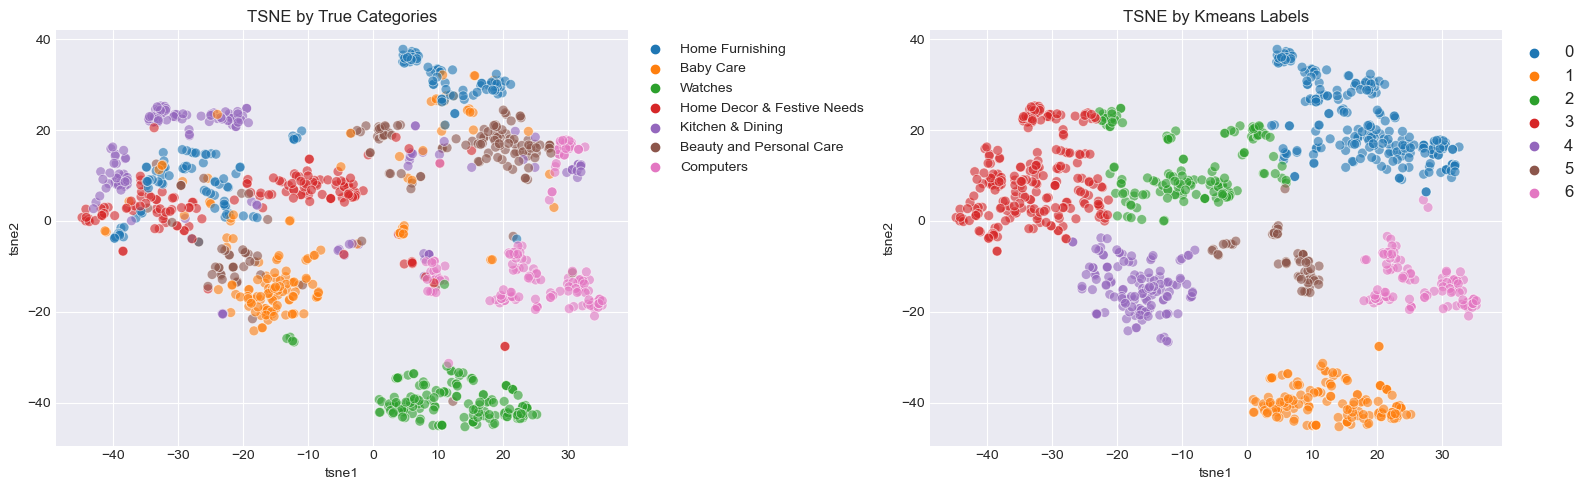

The Adjusted Rand Index is:  0.35


In [459]:
summary = evaluate_model(output, 'DistilBERT (cnicu/product_classifier)', 'Simple', summary)

In [460]:
output = use_distilbert_model("cnicu/product_classifier", text_data["simple_without_word_check"])

All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


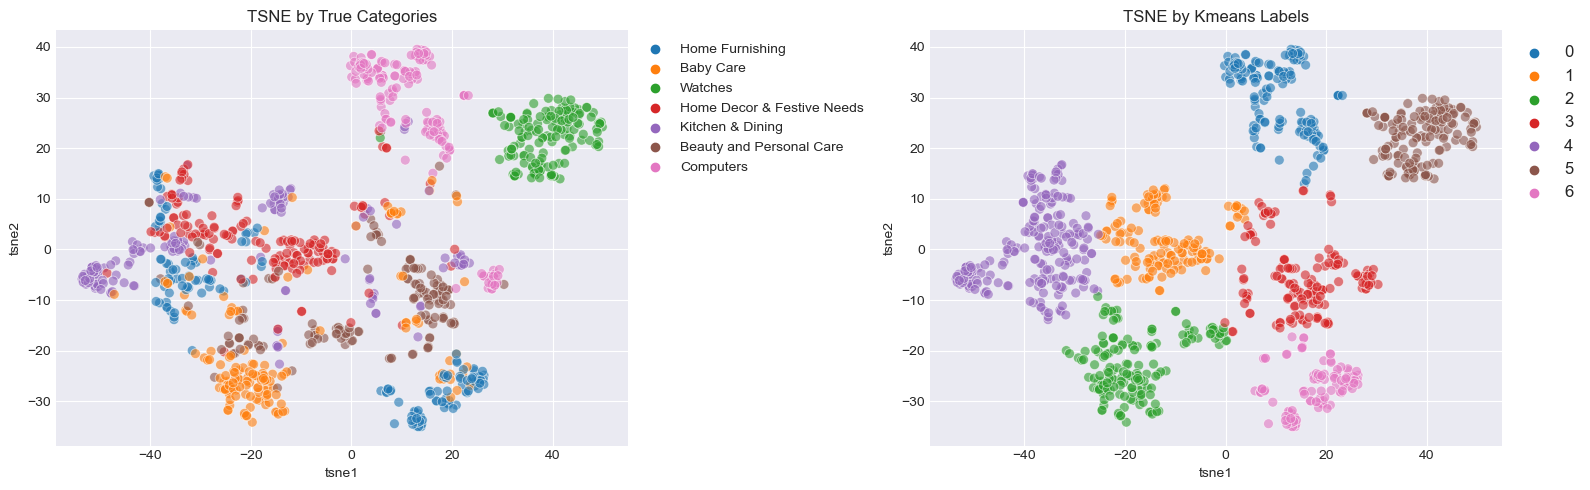

The Adjusted Rand Index is:  0.45


In [461]:
summary = evaluate_model(output, 'DistilBERT (cnicu/product_classifier)', 'Simple Without Word Check', summary)

Sentence Transformer Pretrained Model: all-mpnet-base-v2

In [407]:
model = SentenceTransformer("sentence-transformers/all-mpnet-base-v2", TFAutoModel)
embeddings = model.encode(list(text_data["simple_preprocessing"]))
print(embeddings)

[[-0.00441953 -0.04301028 -0.00248617 ... -0.00651411  0.05115686
   0.00244506]
 [-0.0295813  -0.04845785 -0.00606968 ... -0.00019898  0.0339835
   0.00054783]
 [-0.03357348 -0.09297045 -0.00481585 ... -0.01289036  0.01627186
  -0.02344796]
 ...
 [ 0.05655698 -0.00439403  0.01881683 ... -0.03352133  0.00214059
  -0.03028686]
 [ 0.05605642 -0.02331236  0.00422536 ... -0.0490934  -0.02247079
  -0.01607664]
 [ 0.08084045 -0.01310348  0.00588496 ... -0.03926184 -0.04106209
  -0.02352138]]


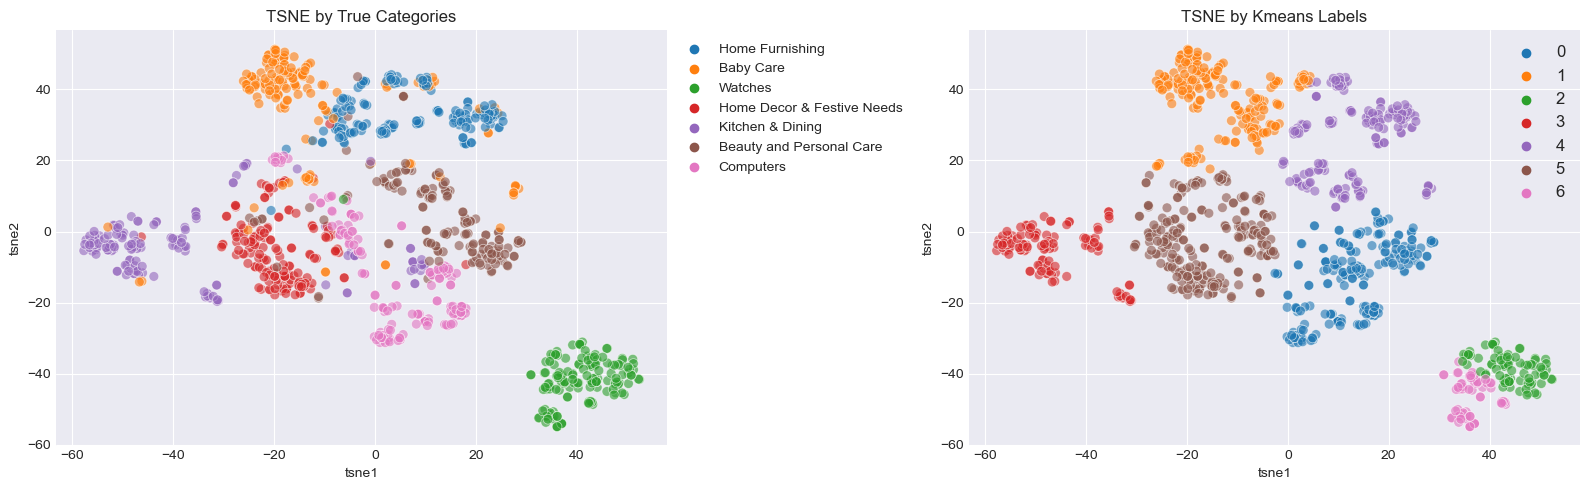

The Adjusted Rand Index is:  0.46


In [408]:
summary = evaluate_model(embeddings, 'BERT (sentence-transformers/all-mpnet-base-v2)', 'Simple', summary)

In [409]:
model = SentenceTransformer("sentence-transformers/all-mpnet-base-v2", TFAutoModel)
embeddings = model.encode(list(text_data["simple_without_word_check"]))

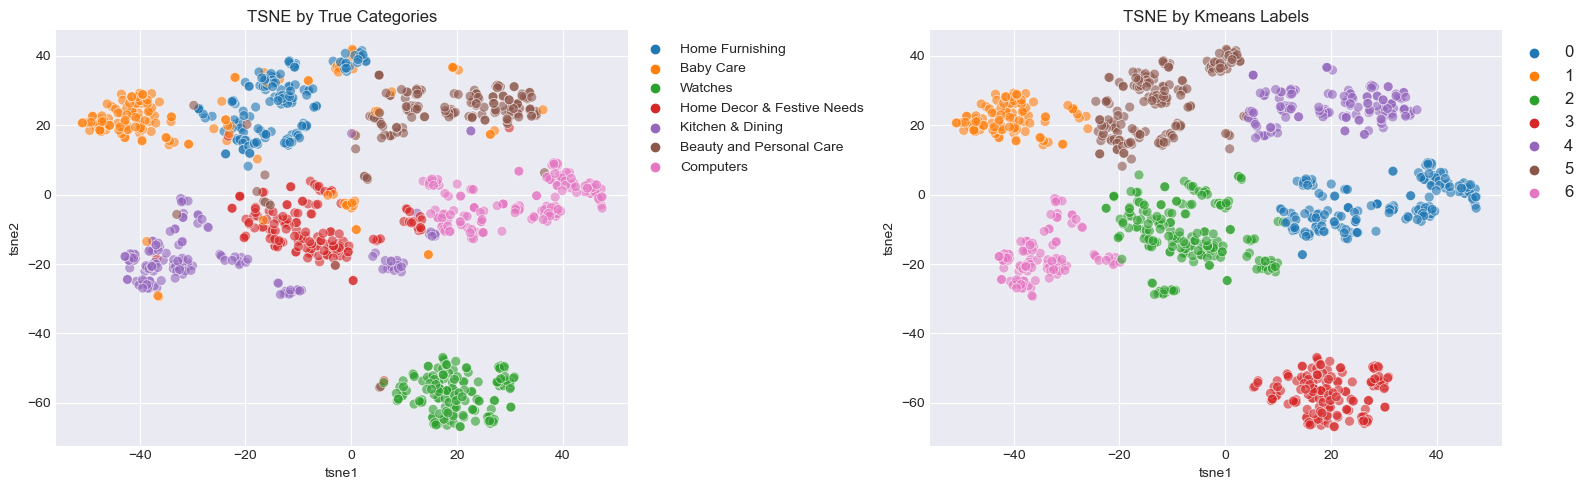

The Adjusted Rand Index is:  0.72


In [410]:
summary = evaluate_model(embeddings, 'BERT (sentence-transformers/all-mpnet-base-v2)', 'Simple Without Word Check', summary)

In [411]:
summary

Model              Preprocessing  \
11  BERT (sentence-transformers/all-mpnet-base-v2)  Simple Without Word Check   
0                                           TF-IDF    Full Without Word Check   
1   BERT (sentence-transformers/all-mpnet-base-v2)                     Simple   
2            DistilBERT (cnicu/product_classifier)  Simple Without Word Check   
3                                         Word2Vec    Full Without Word Check   
4                                         Word2Vec                       Full   
5                                  CountVectorizer                       Full   
6                                  CountVectorizer    Full Without Word Check   
7            DistilBERT (cnicu/product_classifier)                     Simple   
8                                           TF-IDF                       Full   
9                         BERT (bert-base-uncased)  Simple Without Word Check   
10                        BERT (bert-base-uncased)                     Simple   

     ARI  
11  0.72  
0   0.50  
1   0.46  
2   0.45  
3   0.43  
4   0.40  
5   0.38  
6   0.35  
7   0.35  
8   0.31  
9   0.29  
10  0.28

### Universal Sentence Encoder 

In [412]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [462]:
use_embeddings = embed(text_data["simple_preprocessing"])
use_embeddings

<tf.Tensor: shape=(1050, 512), dtype=float32, numpy=
array([[-0.04915561,  0.01841275,  0.0030733 , ...,  0.05511419,
         0.05146017,  0.0054757 ],
       [-0.01409803, -0.03418813, -0.01714735, ...,  0.04318698,
         0.04094348,  0.03853383],
       [-0.05674154,  0.03584264, -0.05044362, ...,  0.05672332,
        -0.0058916 , -0.02548094],
       ...,
       [-0.03492105, -0.04581486, -0.01617063, ...,  0.0130889 ,
         0.06055967, -0.037045  ],
       [-0.03028691, -0.03737516,  0.03419068, ...,  0.05081065,
        -0.00913033, -0.01749554],
       [-0.05005059, -0.03637043,  0.05235622, ...,  0.05288222,
        -0.03370759, -0.00520793]], dtype=float32)>

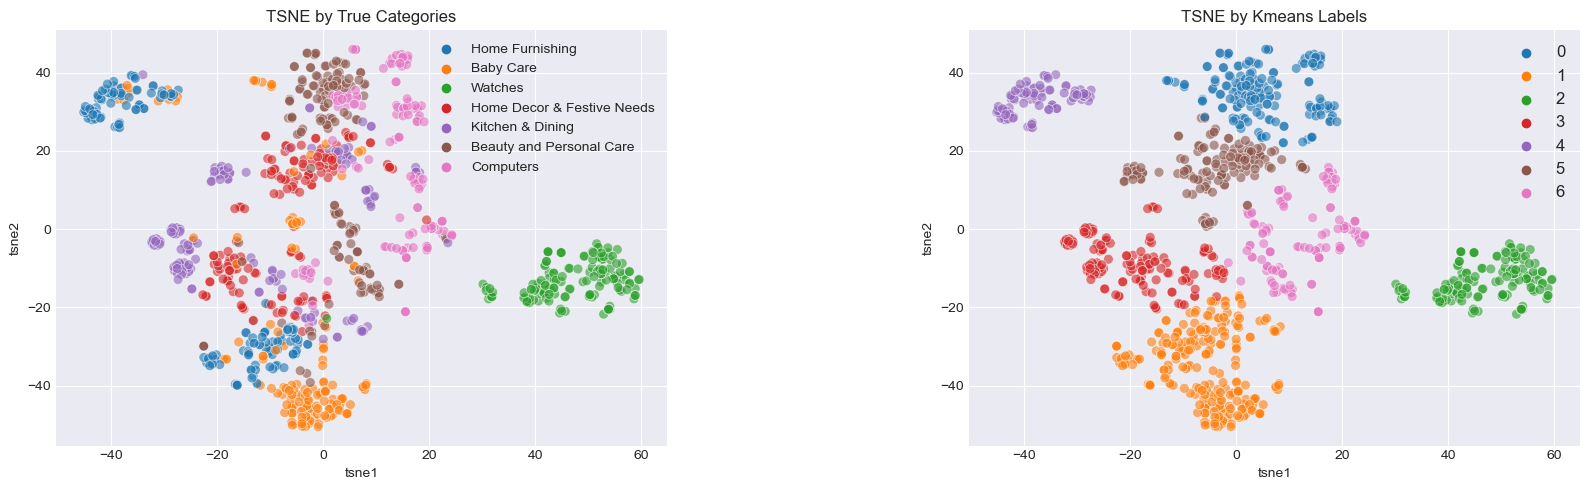

The Adjusted Rand Index is:  0.39


In [463]:
summary = evaluate_model(use_embeddings, 'USE', 'Simple', summary)

In [415]:
use_embeddings = embed(list(text_data["simple_without_word_check"]))
use_embeddings

<tf.Tensor: shape=(1050, 512), dtype=float32, numpy=
array([[-0.05234206,  0.01698462,  0.01395195, ...,  0.05179762,
         0.04806759, -0.02123316],
       [-0.0409479 , -0.04038576, -0.01424784, ...,  0.03453248,
         0.03164646,  0.02446604],
       [-0.05768931,  0.02907455, -0.04412445, ...,  0.05693468,
        -0.03430071, -0.04650286],
       ...,
       [-0.03102372, -0.0406456 , -0.01090005, ...,  0.01447492,
         0.03760457, -0.06195777],
       [-0.03371152, -0.042854  ,  0.0446265 , ...,  0.0487286 ,
        -0.0243726 , -0.02605126],
       [-0.05159793, -0.02765067,  0.04100226, ...,  0.05827805,
        -0.02811701, -0.00974828]], dtype=float32)>

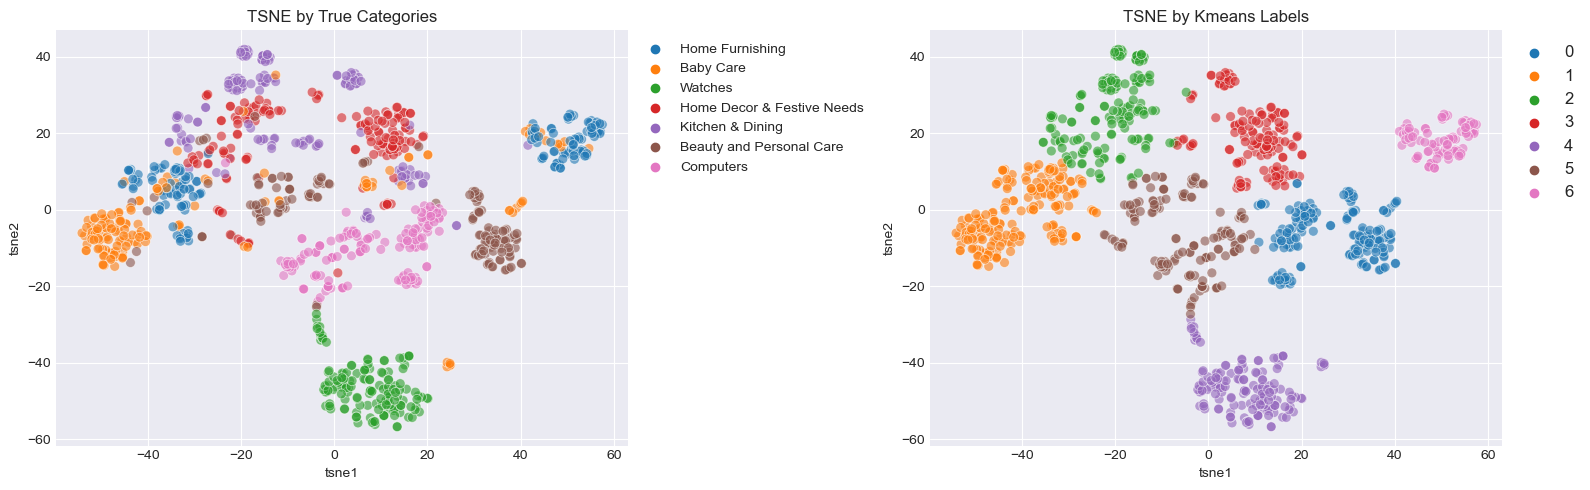

The Adjusted Rand Index is:  0.44


In [416]:
summary = evaluate_model(use_embeddings, 'USE', 'Simple Without Word Check', summary)

In [417]:
summary

Model              Preprocessing  \
0   BERT (sentence-transformers/all-mpnet-base-v2)  Simple Without Word Check   
1                                           TF-IDF    Full Without Word Check   
2   BERT (sentence-transformers/all-mpnet-base-v2)                     Simple   
3            DistilBERT (cnicu/product_classifier)  Simple Without Word Check   
13                                             USE  Simple Without Word Check   
4                                         Word2Vec    Full Without Word Check   
5                                         Word2Vec                       Full   
6                                              USE                     Simple   
7                                  CountVectorizer                       Full   
8                                  CountVectorizer    Full Without Word Check   
9            DistilBERT (cnicu/product_classifier)                     Simple   
10                                          TF-IDF                       Full   
11                        BERT (bert-base-uncased)  Simple Without Word Check   
12                        BERT (bert-base-uncased)                     Simple   

     ARI  
0   0.72  
1   0.50  
2   0.46  
3   0.45  
13  0.44  
4   0.43  
5   0.40  
6   0.39  
7   0.38  
8   0.35  
9   0.35  
10  0.31  
11  0.29  
12  0.28

The text analysis confirms the feasability of creating a classification engine using the product descriptions. 

The efficiency of the predictions will largely depend on the chosen model. Based on the comparisons of ARI across a few different models, the pretrained sentence-transformers/all-mpnet-base-v2 BERT model yield the most accurate predictions when compared to the product's true categories. 

These models can then be improved in order to yield even more accurate predictions.

# Image Analysis

In [418]:
path = "data/Images/"

image_data = data[["category", "encoded_category", "image"]]
image_data

category  encoded_category                                 image
0     Home Furnishing                 4  55b85ea15a1536d46b7190ad6fff8ce7.jpg
1           Baby Care                 0  7b72c92c2f6c40268628ec5f14c6d590.jpg
2           Baby Care                 0  64d5d4a258243731dc7bbb1eef49ad74.jpg
3     Home Furnishing                 4  d4684dcdc759dd9cdf41504698d737d8.jpg
4     Home Furnishing                 4  6325b6870c54cd47be6ebfbffa620ec7.jpg
...               ...               ...                                   ...
1045        Baby Care                 0  958f54f4c46b53c8a0a9b8167d9140bc.jpg
1046        Baby Care                 0  fd6cbcc22efb6b761bd564c28928483c.jpg
1047        Baby Care                 0  5912e037d12774bb73a2048f35a00009.jpg
1048        Baby Care                 0  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg
1049        Baby Care                 0  f2f027ad6a6df617c9f125173da71e44.jpg

[1050 rows x 3 columns]

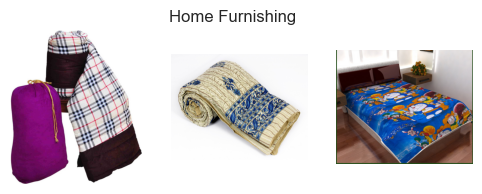

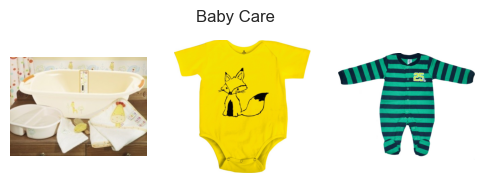

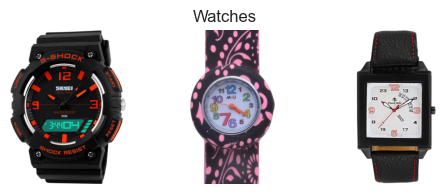

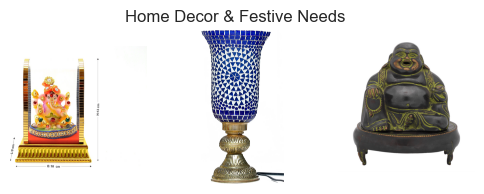

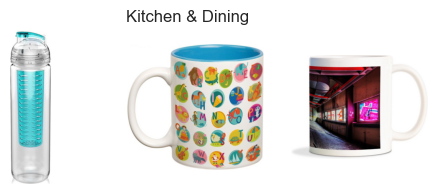

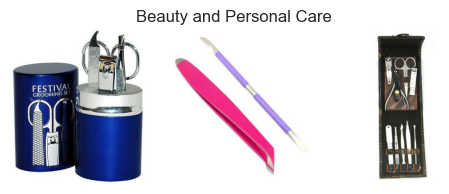

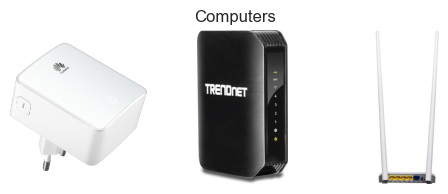

In [419]:
def list_images_by_category(category):
    return [
        image_data["image"][i] for i in range(len(image_data)) if image_data["category"][i] == category
    ]


home_furnishing_images = list_images_by_category("Home Furnishing")
baby_care_images = list_images_by_category("Baby Care")
watches_images = list_images_by_category("Watches")
home_decor_images = list_images_by_category("Home Decor & Festive Needs")
kitchen_images = list_images_by_category("Kitchen & Dining")
beauty_images = list_images_by_category("Beauty and Personal Care")
computers_images = list_images_by_category("Computers")

for name in image_data["category"].unique():
    fig = plt.figure(figsize=(6, 2))
    for i in range(3):
        plt.subplot(130 + 1 + i)
        filename = list_images_by_category(name)[i + 15]
        image = imread(path + filename)
        plt.imshow(image)
        plt.xticks([])
        plt.yticks([])
        plt.suptitle(name)
    plt.show()

## SIFT

Identifying keypoints and associated descriptors for each image 

In [420]:
sift = cv2.SIFT_create()
sift_keypoints = []
sift_descriptors = []
for index in range(len(image_data["image"])):
    image = cv2.imread(path + image_data["image"][index], 0)
    image = cv2.equalizeHist(image)
    keypoints, descriptors = sift.detectAndCompute(image, None)
    sift_keypoints.append(keypoints)
    sift_descriptors.append(descriptors)

sift_descriptors_by_image = np.asarray(sift_descriptors, dtype="object")
sift_descriptors_all = np.concatenate(sift_descriptors_by_image, axis=0)

Example of an image's descriptors

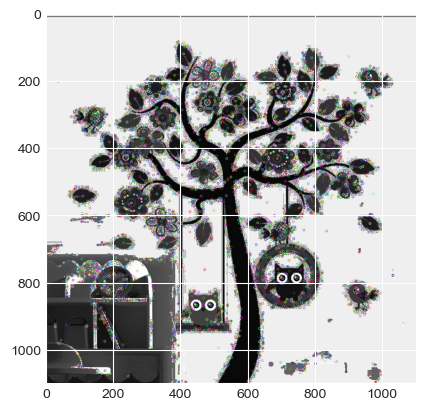

Descriptors :  (5755, 128)
[[102.   5.   0. ...   5.   0.   0.]
 [  0.   0.   0. ...   1.   1.   0.]
 [  3.   1. 118. ...   0.   0.   0.]
 ...
 [  0.   0.   5. ...  12.  11.  45.]
 [  0.   2.  30. ...   0.   0.   4.]
 [  1.   0.   1. ...  15.   0.   0.]]


In [421]:
sample_image = cv2.drawKeypoints(image, keypoints, image)
plt.imshow(sample_image)
plt.show()
print("Descriptors : ", descriptors.shape)
print(descriptors)

Example of matching descriptors between two images

In [422]:
bf = cv2.BFMatcher()

img1 = cv2.imread(path + image_data["image"][0], 0)
img2 = cv2.imread(path + image_data["image"][1], 0)

matches = bf.match(sift_descriptors[0], sift_descriptors[1])
matches = sorted(matches, key = lambda x:x.distance)

# cv2.imshow('SIFT', cv2.drawMatches(img1, sift_keypoints[0], img2, sift_keypoints[1], matches[300:600], img2))

In [423]:
len(sift_descriptors_all)

9051319

Feature clustering for all images => creation of visual words 

In [424]:
k = int(round(np.sqrt(len(sift_descriptors_all)), 0))
print("Estimated number of clusters: ", k)
print("Creation of ", k, " clusters of descriptors ...")

kmeans = MiniBatchKMeans(n_clusters=k, init_size=3 * k, random_state=0, n_init='auto')
kmeans.fit(sift_descriptors_all)

Estimated number of clusters:  3009
Creation of  3009  clusters of descriptors ...


MiniBatchKMeans(init_size=9027, n_clusters=3009, n_init='auto', random_state=0)

Building a histogram for each image to indicate the frequency of each visual word within the image

In [425]:
histogram_vectors = []

def build_histogram(kmeans, descriptors, image_num):
    result = kmeans.predict(descriptors)
    hist = np.zeros(len(kmeans.cluster_centers_))
    descriptors_count = len(descriptors)
    if descriptors_count == 0:
        print("error encountered for image  : ", image_num)
    for i in result:
        hist[i] += 1.0 / descriptors_count
    return hist


for i, image_description in enumerate(sift_descriptors_by_image):
    if i % 100 == 0:
        print(i)
    hist = build_histogram(kmeans, image_description, i)
    histogram_vectors.append(hist)

image_features = np.asarray(histogram_vectors)

0
100
200
300
400
500
600
700
800
900
1000


### PCA

Reducing the dataset's dimension using PCA

In [426]:
print("Dataset dimension before PCA: ", image_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca = pca.fit_transform(image_features)
print("Dataset dimension after PCA: ", feat_pca.shape)

Dataset dimension before PCA:  (1050, 3009)
Dataset dimension after PCA:  (1050, 747)


### TSNE

Reducing further using TSNE and comparing the results between true categories and predicted clusters 

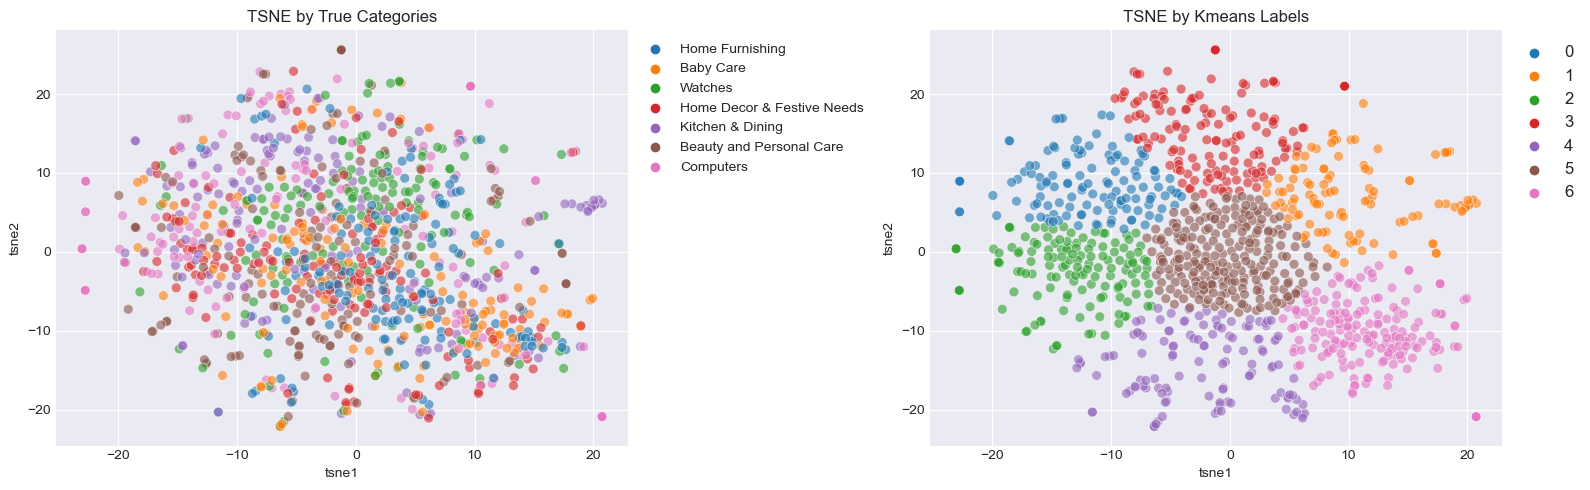

The Adjusted Rand Index is:  0.04


In [427]:
summary = evaluate_model(feat_pca, "SIFT", "Image Analysis", summary)

The ARI score demonstrastes the inability to successfully and confidently predict an image's category based on its features using SIFT

In [428]:
predicted_labels = get_kmeans_labels(feat_pca)

In [429]:
matrix = confusion_matrix(image_data["encoded_category"], predicted_labels)
matrix

array([[  4,  38,   0, 106,   0,   0,   2],
       [  5,  53,   0,  91,   0,   0,   1],
       [ 24,  86,   0,  38,   0,   1,   1],
       [  4,  27,   0, 118,   0,   1,   0],
       [  1,  31,   0, 115,   1,   2,   0],
       [  8,  93,   1,  48,   0,   0,   0],
       [  3, 107,   0,  38,   0,   0,   2]])

In [430]:
corresp = np.argmax(confusion_matrix(image_data["encoded_category"], predicted_labels), axis=0)
corresp

array([2, 6, 5, 3, 4, 4, 0])

In [431]:
def conf_mat_transform(y_true, y_pred, corresp):
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels["y_pred"] = y_pred
    labels["y_pred_transform"] = labels["y_pred"].apply(lambda x: corresp[x])

    return labels["y_pred_transform"]

In [432]:
predicted_labels_transform = conf_mat_transform(image_data["encoded_category"], predicted_labels, [2, 6, 5, 3, 1, 4, 0])
matrix = confusion_matrix(image_data["encoded_category"], predicted_labels_transform)
print(classification_report(image_data["encoded_category"], predicted_labels_transform))

              precision    recall  f1-score   support

           0       0.33      0.01      0.03       150
           1       0.00      0.00      0.00       150
           2       0.49      0.16      0.24       150
           3       0.21      0.79      0.34       150
           4       0.50      0.01      0.03       150
           5       1.00      0.01      0.01       150
           6       0.25      0.71      0.37       150

    accuracy                           0.24      1050
   macro avg       0.40      0.24      0.14      1050
weighted avg       0.40      0.24      0.14      1050



In [433]:
df_cm = pd.DataFrame(
    matrix, index=[label for label in categories], columns=[i for i in "2653140"]
)
df_cm

2  6   5    3  1  4    0
Baby Care                   2  0   4  106  0  0   38
Beauty and Personal Care    1  0   5   91  0  0   53
Computers                   1  0  24   38  1  0   86
Home Decor & Festive Needs  0  0   4  118  1  0   27
Home Furnishing             0  1   1  115  2  0   31
Kitchen & Dining            0  0   8   48  0  1   93
Watches                     2  0   3   38  0  0  107

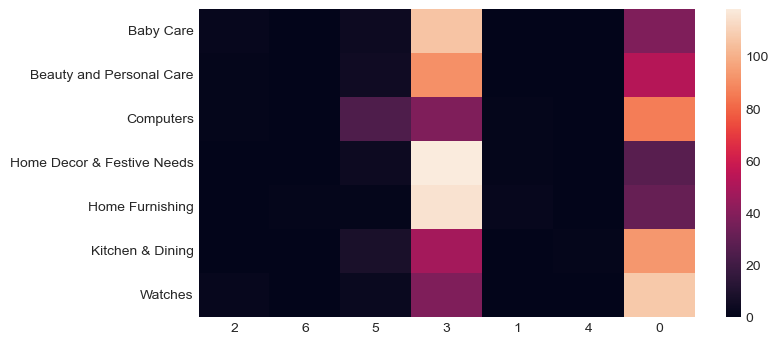

In [434]:

plt.figure(figsize=(8, 4))
sns.heatmap(df_cm)
plt.show()

The categories that were most successfully predicted are watches and home decor which is the category with the highest recall 

The average precision is 40%

## CNN

In [435]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array

Sample VGG16 on one image

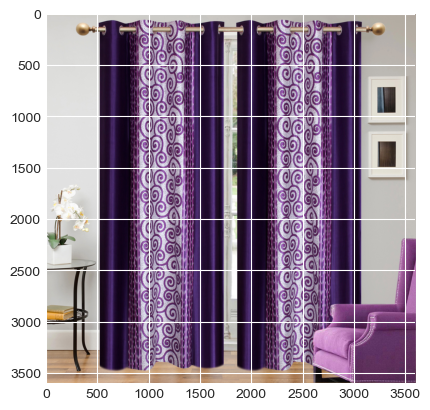

In [436]:
sample = path + image_data["image"][0]
plt.imshow(plt.imread(sample))

In [437]:
image = load_img(sample, target_size=(224, 224))
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)

In [438]:
base_model = VGG16()
print(base_model.summary())
sample_prediction = base_model.predict(image)
label = decode_predictions(sample_prediction)
label[0]

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

[('n03388549', 'four-poster', 0.36765894),
 ('n04209239', 'shower_curtain', 0.19439968),
 ('n04429376', 'throne', 0.05745868),
 ('n04550184', 'wardrobe', 0.049819857),
 ('n02699494', 'altar', 0.042683993)]

Loading the pre-trained VGG16 model without the last layer

In [439]:
base_model = VGG16()
model = Model(inputs=base_model.inputs, outputs=base_model.layers[-2].output)

print(model.summary())

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

Reshaping the images to fit the model and making predictions

In [440]:
images_features = []
i = 0
for image_file in image_data["image"]:
    if i % 100 == 0:
        print(i, '/', len(image_data["image"]))
    i += 1
    image = load_img(path + image_file, target_size=(224, 224))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)
    images_features.append(model.predict(image, verbose=0)[0])

images_features = np.asarray(images_features)

0 / 1050
100 / 1050
200 / 1050
300 / 1050
400 / 1050
500 / 1050
600 / 1050


/Users/amelie-dzovinar/Dev/anaconda3/envs/p6/lib/python3.11/site-packages/PIL/Image.py:3157: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


700 / 1050
800 / 1050
900 / 1050
1000 / 1050


In [441]:
print("Before PCA:", images_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca = pca.fit_transform(images_features)
print("After PCA:", feat_pca.shape)

Before PCA: (1050, 4096)
After PCA: (1050, 803)


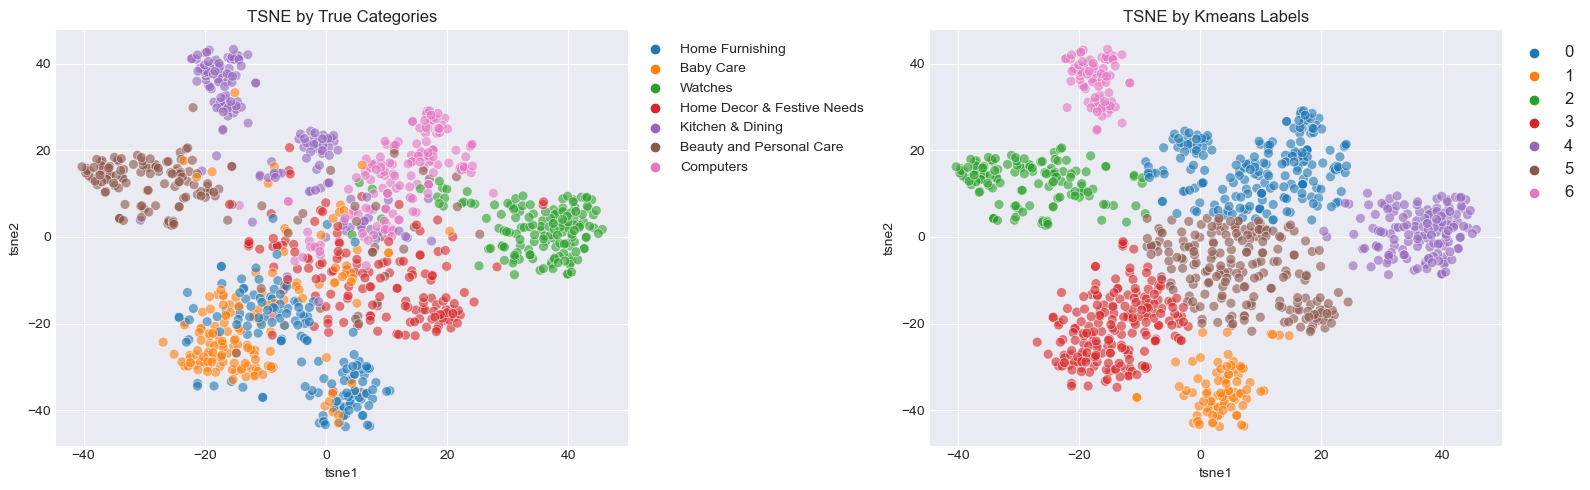

The Adjusted Rand Index is:  0.48


In [442]:
summary = evaluate_model(feat_pca, "CNN", "Image Analysis", summary)

The ARI is much better than the one obtained with SIFT

The category separation is more obvious using CNN compared to the SIFT algorithm.

This suggests that using CNN it is possible to effectively predict an image's category

In [443]:
predicted_labels = get_kmeans_labels(feat_pca)

In [444]:
matrix = confusion_matrix(image_data['encoded_category'], predicted_labels)
print(matrix)
np.argmax(matrix, axis=0)

[[  0 109  29   1   1  10   0]
 [  0  12  44   0  93   1   0]
 [  1   1 147   0   1   0   0]
 [  0   5 139   0   0   4   2]
 [  0  81   5   0   0  64   0]
 [  0   0  73  75   1   1   0]
 [  0   0  21   0   0   0 129]]


array([2, 0, 2, 5, 1, 4, 6])

In [445]:
true_labels = image_data['encoded_category']
cls_labels_transform = conf_mat_transform(true_labels, predicted_labels, [3, 0, 2, 5, 1, 4, 6])
matrix_transform = confusion_matrix(true_labels, cls_labels_transform)
print(classification_report(true_labels, cls_labels_transform))

df_cm = pd.DataFrame(
    matrix_transform,
    index=[label for label in categories],
    columns=[i for i in "3025146"],
)
df_cm

              precision    recall  f1-score   support

           0       0.52      0.73      0.61       150
           1       0.97      0.62      0.76       150
           2       0.32      0.98      0.48       150
           3       0.00      0.00      0.00       150
           4       0.80      0.43      0.56       150
           5       0.99      0.50      0.66       150
           6       0.98      0.86      0.92       150

    accuracy                           0.59      1050
   macro avg       0.66      0.59      0.57      1050
weighted avg       0.66      0.59      0.57      1050



3   0    2  5   1   4    6
Baby Care                   109   1   29  0  10   1    0
Beauty and Personal Care     12  93   44  0   1   0    0
Computers                     1   1  147  1   0   0    0
Home Decor & Festive Needs    5   0  139  0   4   0    2
Home Furnishing              81   0    5  0  64   0    0
Kitchen & Dining              0   1   73  0   1  75    0
Watches                       0   0   21  0   0   0  129

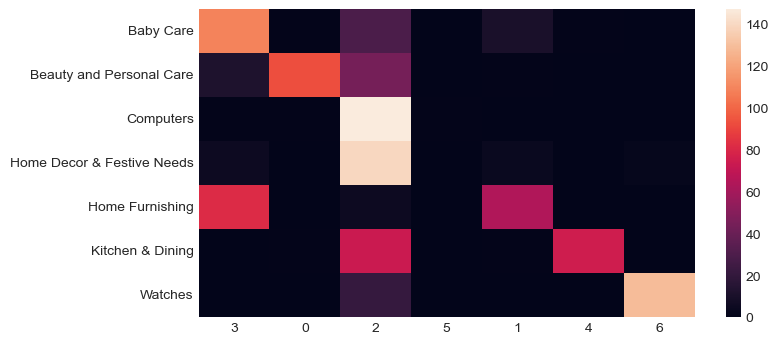

In [446]:
plt.figure(figsize=(8, 4))
sns.heatmap(df_cm)
plt.show()

Computers and Home Decor often get mistaken for one another, with Computers being the most accurate alors with Watches and Baby Care. 

Home decor almost always gets mistaken for a computer and home furnishing with Baby Care.

Nonetheless, this pretrained model is enough to support the feasability of a classification engine based on image recognition

In [447]:
summary

Model              Preprocessing  \
0   BERT (sentence-transformers/all-mpnet-base-v2)  Simple Without Word Check   
1                                           TF-IDF    Full Without Word Check   
15                                             CNN             Image Analysis   
2   BERT (sentence-transformers/all-mpnet-base-v2)                     Simple   
3            DistilBERT (cnicu/product_classifier)  Simple Without Word Check   
4                                              USE  Simple Without Word Check   
5                                         Word2Vec    Full Without Word Check   
6                                         Word2Vec                       Full   
7                                              USE                     Simple   
8                                  CountVectorizer                       Full   
9                                  CountVectorizer    Full Without Word Check   
10           DistilBERT (cnicu/product_classifier)                     Simple   
11                                          TF-IDF                       Full   
12                        BERT (bert-base-uncased)  Simple Without Word Check   
13                        BERT (bert-base-uncased)                     Simple   
14                                            SIFT             Image Analysis   

     ARI  
0   0.72  
1   0.50  
15  0.48  
2   0.46  
3   0.45  
4   0.44  
5   0.43  
6   0.40  
7   0.39  
8   0.38  
9   0.35  
10  0.35  
11  0.31  
12  0.29  
13  0.28  
14  0.04

The results from both the text analysis and image analysis confirm the feasability of a classification engine to predict the category of a product. 

With supervised classification we expect to obtain ever better results.